In [78]:
# Config and Imports

import os
import pandas as pd
import numpy as np
import random
random.seed(1)

# Load Data and Initial Exploration
The dataset is from the CDC 2023 BRFSS survey.

This section covers initial exploration and manual selection of features that may be related to the target variable **DIABETE4** (diabetes).

Note: This project excludes cases of diabetes during pregnancy.

Some markdowns in this notebook are for personal learning notes.

In [79]:
file_path = './data/raw/LLCP2023.XPT'
df = pd.read_sas(file_path, format='xport', encoding='latin1')


In [80]:
df.shape
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.0,1.0,03012023,03,01,2023,1100.0,2023000001,2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0,1.0,1.0,9.0
1,1.0,1.0,01062023,01,06,2023,1100.0,2023000002,2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
2,1.0,1.0,03082023,03,08,2023,1100.0,2023000003,2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
3,1.0,1.0,03062023,03,06,2023,1100.0,2023000004,2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,01062023,01,06,2023,1100.0,2023000005,2.023000e+09,1.0,...,7.000000e+00,1.0,4.700000e+01,1.0,2.0,1.0,2.0,1.0,1.0,2.0


In [81]:
print(df.columns.tolist())
df.info()
df.describe()

['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'NUMADULT', 'RESPSLC1', 'LANDSEX2', 'LNDSXBRT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX2', 'CELSXBRT', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINS1', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'EXRACT12', 'EXEROFT1', 'EXERHMM1', 'EXRACT22', 'EXEROFT2', 'EXERHMM2', 'STRENGTH', 'BPHIGH6', 'BPMEDS1', 'CHOLCHK3', 'TOLDHI3', 'CHOLMED3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL4', 'NUMPHON4', 'CPDEMO1C', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'PREGNANT', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'FALL12MN', 'FALLINJ5', 'SMOKE100', 'SMOKDA

,_STATE,FMONTH,DISPCODE,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
count,433323.000000,433323.000000,433323.000000,4.333230e+05,88345.0,88345.000000,12.0,88345.000000,88346.000000,88345.000000,...,4.333230e+05,433323.000000,4.333230e+05,433323.000000,170823.000000,170823.000000,403710.000000,433323.000000,433323.000000,433323.000000
mean,30.486898,6.612273,1117.783963,2.023005e+09,1.0,1.000136,1.0,1.000011,2.000023,1.001505,...,7.746976e+01,1.739282,7.826639e+03,1.660750,2.138272,2.270057,2.028681,1.633470,1.698735,5.565327
std,16.670560,3.518848,38.237812,4.455869e+03,0.0,0.011654,0.0,0.003364,0.006729,0.038771,...,2.256125e+02,2.123753,2.637115e+04,2.113355,2.368834,2.618224,1.686731,2.074538,2.069306,3.515690
min,1.000000,1.000000,1100.000000,2.023000e+09,1.0,1.000000,1.0,1.000000,2.000000,1.000000,...,5.397605e-79,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,3.000000,1100.000000,2.023002e+09,1.0,1.000000,1.0,1.000000,2.000000,1.000000,...,5.397605e-79,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,29.000000,7.000000,1100.000000,2.023004e+09,1.0,1.000000,1.0,1.000000,2.000000,1.000000,...,3.000000e+00,1.000000,4.700000e+01,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,9.000000
75%,45.000000,10.000000,1100.000000,2.023008e+09,1.0,1.000000,1.0,1.000000,2.000000,1.000000,...,2.900000e+01,1.000000,4.000000e+02,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,9.000000
max,78.000000,12.000000,1200.000000,2.023026e+09,1.0,2.000000,1.0,2.000000,4.000000,2.000000,...,9.000000e+02,9.000000,9.990000e+04,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [82]:
# Initial feature selection, done manually using domain knowledge
manually_sf = ['DIABETE4','_AIDTST4', 'DROCDY4_', '_RFDRHV8', '_INCOMG1', 'SMOKE100', '_RFSMOK3', '_BMI5CAT', 'HTM4', 'WTKG3', '_AGE_G', '_SEX', '_RACE', '_RACEGR3', '_RFHYPE6', '_PACAT3', '_RFCHOL3', '_MICHD', 'SDHSTRE1', 'CHKHEMO3', 'STRSYMP5', 'HASYMP1', 'HASYMP2', 'HASYMP3', 'HASYMP5', 'HASYMP6', 'EYEEXAM1', 'FEETSORE', 'PDIABTS1', 'PREDIAB2', 'ECIGNOW2', 'ALCDAY4', 'AVEDRNK3', 'FALL12MN', 'FALLINJ5', 'DIFFWALK', 'PREGNANT','VETERAN3', 'EMPLOY1', 'EDUCA', 'RENTHOM1', 'MARITAL', 'CHCKDNY2', 'HAVARTH4', 'STRENGTH', 'BPHIGH6', 'BPMEDS1', 'CHOLCHK3', 'TOLDHI3', 'CHOLMED3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'EXRACT12', 'EXEROFT1', 'EXERHMM1', 'EXRACT22', 'PHYSHLTH', 'MENTHLTH',   ]

In [83]:
new_df=df[manually_sf]

In [84]:
new_df.info()
new_df.describe()
new_df.shape
new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Data columns (total 64 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DIABETE4  433318 non-null  float64
 1   _AIDTST4  403710 non-null  float64
 2   DROCDY4_  433323 non-null  float64
 3   _RFDRHV8  433323 non-null  float64
 4   _INCOMG1  433323 non-null  float64
 5   SMOKE100  413649 non-null  float64
 6   _RFSMOK3  433323 non-null  float64
 7   _BMI5CAT  392788 non-null  float64
 8   HTM4      411182 non-null  float64
 9   WTKG3     399172 non-null  float64
 10  _AGE_G    433323 non-null  float64
 11  _SEX      433323 non-null  float64
 12  _RACE     433237 non-null  float64
 13  _RACEGR3  433237 non-null  float64
 14  _RFHYPE6  433323 non-null  float64
 15  _PACAT3   433323 non-null  float64
 16  _RFCHOL3  381512 non-null  float64
 17  _MICHD    428738 non-null  float64
 18  SDHSTRE1  223493 non-null  float64
 19  CHKHEMO3  24260 non-null   float64
 20  STRS

,DIABETE4,_AIDTST4,DROCDY4_,_RFDRHV8,_INCOMG1,SMOKE100,_RFSMOK3,_BMI5CAT,HTM4,WTKG3,...,ASTHNOW,MEDCOST1,CHECKUP1,EXERANY2,EXRACT12,EXEROFT1,EXERHMM1,EXRACT22,PHYSHLTH,MENTHLTH
0,1.0,2.0,5.397605e-79,1.0,9.0,2.0,1.0,4.0,160.0,7802.0,...,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,88.0,88.0
1,3.0,2.0,5.397605e-79,1.0,9.0,2.0,1.0,3.0,145.0,5987.0,...,NaN,2.0,2.0,1.0,1.0,106.0,30.0,88.0,88.0,88.0
2,3.0,2.0,5.397605e-79,1.0,1.0,1.0,1.0,2.0,163.0,5897.0,...,1.0,1.0,1.0,1.0,1.0,205.0,15.0,88.0,6.0,2.0
3,3.0,1.0,5.397605e-79,1.0,9.0,2.0,1.0,3.0,168.0,7711.0,...,NaN,2.0,3.0,1.0,1.0,103.0,30.0,88.0,2.0,88.0
4,1.0,2.0,7.000000e+00,1.0,5.0,2.0,1.0,3.0,173.0,7711.0,...,NaN,2.0,1.0,1.0,1.0,102.0,45.0,8.0,88.0,88.0


# Preprocessing steps
- Cleaning and Remapping
- EDA
- Feature Engineering
- Feature selection

## Cleaning and Remapping
This step involved:
- Removing duplicates.
- Cleaning the target variable.
- Checking for nulls in all columns.

Replacing invalid codes:
- Global replacement: Used ***`replace_7_9_globally_except`*** for features known to use 7 or 9 as “I don’t know” or “Refused.”
- Targeted replacement: Created a dictionary ***`manual_invalid_code`*** mapping specific columns to their respective invalid codes (e.g., 99, 9, 999, 77). A loop replaced these values with NaN only for columns present in the dataset.
- Dropping features with more than **40% null values**.
- Remapping selected features to retain only relevant values (e.g., remapping 3 to 1 for “Yes”). This was handled by ***`clean_and_remap`***.



In [85]:
# Drop duplicate rows and duplicate columns
new_df= new_df.drop_duplicates()
new_df= new_df.loc[:, ~new_df.columns.duplicated()]
new_df.shape
new_df.isnull().sum()


DIABETE4         5
_AIDTST4     29602
DROCDY4_         0
_RFDRHV8         0
_INCOMG1         0
             ...  
EXEROFT1    110200
EXERHMM1    110202
EXRACT22    110201
PHYSHLTH         3
MENTHLTH         3
Length: 64, dtype: int64

In [86]:
# Filter rows where DIABETE4 is 1 or 3
new_df = new_df[new_df['DIABETE4'].isin([1,3])]
new_df['Diabetes'] = new_df['DIABETE4'].map({1:1, 3:0})
new_df = new_df.drop(columns='DIABETE4')
new_df['Diabetes'].value_counts
new_df.shape
new_df.head(10)

,_AIDTST4,DROCDY4_,_RFDRHV8,_INCOMG1,SMOKE100,_RFSMOK3,_BMI5CAT,HTM4,WTKG3,_AGE_G,...,MEDCOST1,CHECKUP1,EXERANY2,EXRACT12,EXEROFT1,EXERHMM1,EXRACT22,PHYSHLTH,MENTHLTH,Diabetes
0,2.0,5.397605e-79,1.0,9.0,2.0,1.0,4.0,160.0,7802.0,6.0,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,88.0,88.0,1
1,2.0,5.397605e-79,1.0,9.0,2.0,1.0,3.0,145.0,5987.0,6.0,...,2.0,2.0,1.0,1.0,106.0,30.0,88.0,88.0,88.0,0
2,2.0,5.397605e-79,1.0,1.0,1.0,1.0,2.0,163.0,5897.0,6.0,...,1.0,1.0,1.0,1.0,205.0,15.0,88.0,6.0,2.0,0
3,1.0,5.397605e-79,1.0,9.0,2.0,1.0,3.0,168.0,7711.0,6.0,...,2.0,3.0,1.0,1.0,103.0,30.0,88.0,2.0,88.0,0
4,2.0,7.000000e+00,1.0,5.0,2.0,1.0,3.0,173.0,7711.0,6.0,...,2.0,1.0,1.0,1.0,102.0,45.0,8.0,88.0,88.0,1
5,1.0,1.700000e+01,1.0,5.0,2.0,1.0,4.0,157.0,7484.0,5.0,...,2.0,1.0,1.0,1.0,212.0,45.0,88.0,2.0,3.0,0
6,1.0,5.397605e-79,1.0,4.0,1.0,1.0,2.0,183.0,8165.0,6.0,...,2.0,1.0,2.0,NaN,NaN,NaN,NaN,8.0,77.0,0
7,2.0,5.397605e-79,1.0,9.0,2.0,1.0,3.0,150.0,6123.0,6.0,...,2.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,88.0,1
8,2.0,5.397605e-79,1.0,4.0,2.0,1.0,4.0,163.0,8845.0,6.0,...,2.0,1.0,2.0,NaN,NaN,NaN,NaN,5.0,88.0,0
9,2.0,5.397605e-79,1.0,5.0,1.0,1.0,2.0,178.0,7257.0,6.0,...,2.0,1.0,1.0,1.0,230.0,30.0,88.0,88.0,88.0,1


In [87]:
# Check columns with null values
new_df.isnull().sum()[new_df.isnull().sum() > 0]

_AIDTST4     28695
SMOKE100     19061
_BMI5CAT     38888
HTM4         21236
WTKG3        32830
_RACE           86
_RACEGR3        86
_RFCHOL3     50398
_MICHD        4074
SDHSTRE1    203100
CHKHEMO3    393985
STRSYMP5    408283
HASYMP1     408156
HASYMP2     408171
HASYMP3     408177
HASYMP5     408194
HASYMP6     408203
EYEEXAM1    393992
FEETSORE    394007
PDIABTS1    259017
PREDIAB2    259096
ECIGNOW2     20793
ALCDAY4      24662
AVEDRNK3    212398
FALL12MN    136604
FALLINJ5    343826
DIFFWALK     15628
PREGNANT    345581
VETERAN3      1166
EMPLOY1       2873
EDUCA            4
RENTHOM1         3
MARITAL          2
STRENGTH         1
BPMEDS1     249529
TOLDHI3      50399
CHOLMED3     51961
CVDSTRK3         1
ASTHNOW     356766
EXRACT12    103538
EXEROFT1    105604
EXERHMM1    105606
EXRACT22    105605
PHYSHLTH         1
MENTHLTH         1
dtype: int64

In [88]:
# Correlation between features and target variable (Diabetes)
corr = new_df.corr(numeric_only=True)
corr_with_target = corr['Diabetes'].sort_values(ascending=False)
print(corr_with_target)

# save correlation 
corr_with_target.to_csv("correlation_with_diabetes.csv")


Diabetes    1.000000
_AGE_G      0.219539
_RFHYPE6    0.197692
_BMI5CAT    0.186033
EMPLOY1     0.185114
              ...   
BPHIGH6    -0.256274
CHKHEMO3         NaN
EYEEXAM1         NaN
FEETSORE         NaN
PDIABTS1         NaN
Name: Diabetes, Length: 64, dtype: float64


In [89]:
# Columns with invalid codes that isnt 9 or 7
exclude_cols = ['_INCOMG1', 'DROCDY4_' ,'_RACE', 'CHKHEMO3', 'ALCDAY4' ,'FALL12MN','EMPLOY1','STRENGTH', 'EXRACT12' ,'EXRACT22' ,'EXEROFT1' ,'EXERHMM1','MENTHLTH', 'PHYSHLTH']

# Replace invalid codes 7 and 9 with null
def replace_7_9_globally_except(df, exclude=[]):
    for col in df.columns:
        if col not in exclude and df[col].dtype in ['int64', 'float64']:
            df.loc[:, col] = df[col].replace({7: np.nan, 9: np.nan})
    return df

new_df = replace_7_9_globally_except(new_df, exclude=exclude_cols)


In [90]:
# Dictionary contains features and their invalid codes
manual_invalid_code = {'_INCOMG1':[9],
                        'DROCDY4_':[900] ,
                        '_RACE':[9], 
                        'CHKHEMO3':[77, 99, 98], 
                        'ALCDAY4':[777, 999] ,
                        'FALL12MN':[77, 99],
                        'EMPLOY1':[9],
                        'STRENGTH':[777, 999], 
                        'EXRACT12':[77, 99] ,
                        'EXRACT22':[77, 99, 88] ,
                        'EXEROFT1':[777, 999] ,
                        'EXERHMM1':[777, 999],
                        'MENTHLTH':[77, 99], 
                        'PHYSHLTH':[77, 99]
                       }


# Replace invalid code with null
for col, invalid_vals in manual_invalid_code.items():
    if col in new_df.columns:
        new_df.loc[:, col] = new_df[col].replace(invalid_vals, np.nan)


In [91]:
# General check for 7 or 9 in numeric columns 
for col in new_df.select_dtypes(include='number').columns:
    if new_df[col].isin([7, 9]).any():
        print(f" Found 7 or 9 in: {col}")

# Manual check for specific codes
for col, vals in manual_invalid_code.items():
    if col in new_df.columns:
        if new_df[col].isin(vals).any():
            print(f" Still found {vals} in: {col}")


 Found 7 or 9 in: DROCDY4_
 Found 7 or 9 in: _INCOMG1
 Found 7 or 9 in: _RACE
 Found 7 or 9 in: CHKHEMO3
 Found 7 or 9 in: FALL12MN
 Found 7 or 9 in: EMPLOY1
 Found 7 or 9 in: EXRACT12
 Found 7 or 9 in: EXERHMM1
 Found 7 or 9 in: EXRACT22
 Found 7 or 9 in: PHYSHLTH
 Found 7 or 9 in: MENTHLTH


In [92]:
# Pick a few cleaned columns
cols_to_check = [ 'EMPLOY1', '_RACE']

for col in cols_to_check:
    if col in new_df.columns:
        print(f"\n{col} value counts:\n", new_df[col].value_counts(dropna=False))



EMPLOY1 value counts:
 EMPLOY1
1.0    172395
7.0    135102
2.0     36834
8.0     24086
5.0     16513
6.0     10053
4.0      8652
NaN      7324
3.0      7286
Name: count, dtype: int64

_RACE value counts:
 _RACE
1.0    303892
8.0     41036
2.0     31387
4.0     11466
7.0      9685
NaN      9080
3.0      6485
6.0      3226
5.0      1988
Name: count, dtype: int64


In [93]:
# Remove columns of small relevance with 40% of its entries null

null_per = new_df.isnull().mean()
high_null_cols = null_per[null_per > 0.4 ].index.tolist()
print(high_null_cols)


['SDHSTRE1', 'CHKHEMO3', 'STRSYMP5', 'HASYMP1', 'HASYMP2', 'HASYMP3', 'HASYMP5', 'HASYMP6', 'EYEEXAM1', 'FEETSORE', 'PDIABTS1', 'PREDIAB2', 'AVEDRNK3', 'FALLINJ5', 'PREGNANT', 'BPMEDS1', 'ASTHNOW', 'EXRACT22']


### Personal Note (for understanding .isnull().mean()):

- df.isnull() gives True if cell is NaN, else False.
- .mean() on boolean DataFrame gives % nulls per column.
- null_percent > 0.4 : filters columns with more than 40% missing values.
- null_per[boolean series ]: selects only the rows where condition is True (From null_per, keep only the columns whose null percentage is greater than 40%.)
- .index.tolist()  converts column names to a Python list.

#### Why these columns were removed:

- Checked correlation of each with the target variable.
- Reviewed the data to see if imputation was possible.
- Most had low correlation and were difficult to fill accurately, so they were dropped.

In [94]:
new_df.drop(columns=high_null_cols, inplace=True)

In [95]:
# Remapping function

def clean_and_remap(df, column, yes_val, no_val,): 

    df[column + '_bin'] = df[column].apply(
        lambda x: 1 if x in yes_val else 0 if x in no_val else np.nan
    )
    
    return df

In [96]:
columns_to_remap={
    'BPHIGH6': {'yes': [1], 'no': [3]},
    'CHOLMED3': {'yes': [1], 'no': [2]},
    '_RFHYPE6': {'yes': [2], 'no': [1]},
    '_MICHD': {'yes':[1], 'no': [2]},
    'DIFFWALK': {'yes':[1], 'no':[2]},
    'TOLDHI3': {'yes':[1], 'no':[2]},
    'HAVARTH4': {'yes':[1], 'no':[2]},
    'EXERANY2': {'yes':[1], 'no':[2]},
    '_RFCHOL3': {'yes':[2], 'no':[1]},
    'CHCKDNY2': {'yes':[1], 'no':[2]},
    'CVDINFR4': {'yes':[1], 'no':[2]},
    'CVDSTRK3': {'yes':[1], 'no':[2]},
    'VETERAN3': {'yes':[1], 'no':[2]},
    'ASTHMA3': {'yes':[1], 'no':[2]},
    'CVDCRHD4': {'yes':[1], 'no':[2]},
    '_RFDRHV8': {'yes':[2], 'no':[1]},
    '_RFSMOK3': {'yes':[2], 'no':[1]},
    'SMOKE100': {'yes':[1], 'no':[2]}
    
}

for col, val in columns_to_remap.items():
    new_df = clean_and_remap(new_df, col, yes_val=val['yes'], no_val=val['no'])



In [97]:
new_df.drop(columns=columns_to_remap.keys(), inplace=True)

## Exploratory Data Analysis (EDA)
This section examines relationships between features and the target variable `DIABETE4` using:

- Correlation (Pearson) and mutual information (MI)
- Correlation heatmaps
- Boxplots, bar charts, and histograms for categorical and numerical features

The correlation and MI values were used to guide whether to drop features, drop rows, or fill missing values using:
- Mean (normally distributed features)
- Median (skewed numerical features)
- Mode (categorical features)

Some features were flagged for transformation, while others were retained in their original form. Additional notes and justifications are provided within the notebook, explaining transformation decisions and interpretations of specific plots.

In [98]:
# Compute correlation matrix 
corr = new_df.corr(numeric_only=True)

for col in new_df.columns:
    if new_df[col].dtype != 'O':  # Exclude object (non-numeric) columns
        nulls = new_df[col].isnull().sum()
        skewness = new_df[col].skew()
        if col in corr.index:
            corr_val = corr['Diabetes'].get(col, 'N/A')  # in case key is missing
        else:
            corr_val = 'N/A'
        print(f"{col}: skew={skewness:.2f}, nulls={nulls}, corr={corr_val}")


_AIDTST4: skew=-0.64, nulls=48473, corr=0.02198881452002273
DROCDY4_: skew=1.92, nulls=28908, corr=-0.11524144016090605
_INCOMG1: skew=-0.58, nulls=83310, corr=-0.13970645094332546
_BMI5CAT: skew=-0.16, nulls=38888, corr=0.18603308729219978
HTM4: skew=-0.02, nulls=21236, corr=-0.01871128446018621
WTKG3: skew=1.07, nulls=32830, corr=0.1670392012413836
_AGE_G: skew=-0.64, nulls=0, corr=0.21953902034991654
_SEX: skew=-0.10, nulls=0, corr=-0.01548611593636857
_RACE: skew=1.94, nulls=9080, corr=0.006458135598863807
_RACEGR3: skew=1.81, nulls=9080, corr=0.012805660389572685
_PACAT3: skew=0.33, nulls=81578, corr=0.13733879046176808
ECIGNOW2: skew=1.53, nulls=22441, corr=-0.02998415506364779
ALCDAY4: skew=0.09, nulls=28908, corr=0.14856653488442567
FALL12MN: skew=-1.06, nulls=139391, corr=-0.09613499279229104
EMPLOY1: skew=0.19, nulls=7324, corr=0.19087404241506217
EDUCA: skew=-0.84, nulls=2146, corr=-0.09243771319059796
RENTHOM1: skew=1.43, nulls=3826, corr=-0.024748746468138728
MARITAL: skew

In [99]:
from sklearn.feature_selection import mutual_info_classif

# Prepare X and y
X = new_df.drop('Diabetes', axis=1)
y = new_df['Diabetes']

# Temporarily fill nulls (so MI doesn't crash )
X_filled = X.fillna(-999)  # value doesn't conflict with real data

# Compute mutual information scores
mi_scores = mutual_info_classif(X_filled, y, discrete_features='auto')

# Create a dataframe for sorting
mi_df = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi_df.head(50))  # Top 50 most informative features


_SEX            0.053538
CHOLMED3_bin    0.048079
_AGE_G          0.044049
FALL12MN        0.041426
_RFHYPE6_bin    0.038362
BPHIGH6_bin     0.037526
PHYSHLTH        0.032448
ALCDAY4         0.029796
EXRACT12        0.026793
_RFCHOL3_bin    0.025955
TOLDHI3_bin     0.025101
EMPLOY1         0.022885
STRENGTH        0.022584
CHOLCHK3        0.021653
DIFFWALK_bin    0.020658
MENTHLTH        0.020187
_PACAT3         0.019380
_BMI5CAT        0.018474
EXERHMM1        0.018337
WTKG3           0.018295
EXEROFT1        0.017580
_INCOMG1        0.015965
CHECKUP1        0.014556
DROCDY4_        0.013226
HAVARTH4_bin    0.012787
_MICHD_bin      0.012276
CHCKDNY2_bin    0.011401
EXERANY2_bin    0.011179
CVDINFR4_bin    0.008643
CVDCRHD4_bin    0.007838
MARITAL         0.006620
EDUCA           0.006300
CVDSTRK3_bin    0.004778
HTM4            0.003961
_AIDTST4        0.003220
SMOKE100_bin    0.003199
_RFDRHV8_bin    0.002930
MEDCOST1        0.002609
_RACEGR3        0.002075
ECIGNOW2        0.001876


In [100]:
mi_scores = pd.Series(mi_scores, index=X.columns)
corr_matrix = new_df.corr(numeric_only=True)


mi_cutoff = 0.02
corr_cutoff = 0.05

null_per = new_df.isnull().mean()
categorical_cols = [col for col in new_df.columns if new_df[col].dtype != 'O' and new_df[col].nunique() < 15]
skipped_features = []
for col in new_df.columns:
    if col == 'Diabetes':
        continue  # skip target

    null_rate = null_per.get(col, 0)
    mi = mi_scores.get(col, 0)
    corr = corr_matrix['Diabetes'].get(col, 0)

    if null_rate == 0:
        continue  # no need to process

    # Decide fill method
    if col in categorical_cols:
        fill_value = new_df[col].mode().iloc[0]
        fill_type = 'mode'
    else:
        fill_value = new_df[col].median() if abs(new_df[col].skew()) > 1 else new_df[col].mean()
        fill_type = 'median' if abs(new_df[col].skew()) > 1 else 'mean'

    # Decision logic
    if mi >= mi_cutoff and abs(corr) >= corr_cutoff:
        new_df[col].fillna(fill_value, inplace=True)
        print(f"[KEEP + FILL] {col} | MI={mi:.3f}, Corr={corr:.3f}, Null={null_rate:.2%}, Fill={fill_type}")

    elif mi >= mi_cutoff:
        new_df[col].fillna(fill_value, inplace=True)
        print(f"[FILL (MI only)] {col} | MI={mi:.3f}, Corr={corr:.3f}, Null={null_rate:.2%}, Fill={fill_type}")

    elif null_rate < 0.05:
        new_df = new_df.dropna(subset=[col])
        print(f"[DROP ROWS] {col} | MI={mi:.3f}, Corr={corr:.3f}, Null={null_rate:.2%}")

    else:
        skipped_features.append(col)
        print(f"[SKIP or DROP] {col} | MI={mi:.3f}, Corr={corr:.3f}, Null={null_rate:.2%}")



[SKIP or DROP] _AIDTST4 | MI=0.003, Corr=0.022, Null=11.59%
[SKIP or DROP] DROCDY4_ | MI=0.013, Corr=-0.115, Null=6.91%
[SKIP or DROP] _INCOMG1 | MI=0.016, Corr=-0.140, Null=19.92%
[SKIP or DROP] _BMI5CAT | MI=0.018, Corr=0.186, Null=9.30%
[SKIP or DROP] HTM4 | MI=0.004, Corr=-0.019, Null=5.08%
[SKIP or DROP] WTKG3 | MI=0.018, Corr=0.167, Null=7.85%
[DROP ROWS] _RACE | MI=0.001, Corr=0.006, Null=2.17%
[DROP ROWS] _RACEGR3 | MI=0.002, Corr=0.013, Null=2.17%
[SKIP or DROP] _PACAT3 | MI=0.019, Corr=0.137, Null=19.50%
[SKIP or DROP] ECIGNOW2 | MI=0.002, Corr=-0.030, Null=5.37%
[KEEP + FILL] ALCDAY4 | MI=0.030, Corr=0.149, Null=6.91%, Fill=mean
[KEEP + FILL] FALL12MN | MI=0.041, Corr=-0.096, Null=33.33%, Fill=median
[KEEP + FILL] EMPLOY1 | MI=0.023, Corr=0.191, Null=1.75%, Fill=mode
[DROP ROWS] EDUCA | MI=0.006, Corr=-0.092, Null=0.51%


C:\Users\chaso\AppData\Local\Temp\ipykernel_38324\3346925601.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df[col].fillna(fill_value, inplace=True)
C:\Users\chaso\AppData\Local\Temp\ipykernel_38324\3346925601.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

[DROP ROWS] RENTHOM1 | MI=0.001, Corr=-0.025, Null=0.91%
[DROP ROWS] MARITAL | MI=0.007, Corr=-0.046, Null=0.96%
[KEEP + FILL] STRENGTH | MI=0.023, Corr=0.086, Null=3.24%, Fill=mean
[KEEP + FILL] CHOLCHK3 | MI=0.022, Corr=-0.091, Null=6.11%, Fill=mode
[DROP ROWS] MEDCOST1 | MI=0.003, Corr=0.003, Null=0.33%


C:\Users\chaso\AppData\Local\Temp\ipykernel_38324\3346925601.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df[col].fillna(fill_value, inplace=True)


[DROP ROWS] CHECKUP1 | MI=0.015, Corr=-0.123, Null=1.32%
[KEEP + FILL] EXRACT12 | MI=0.027, Corr=-0.060, Null=25.25%, Fill=mode
[SKIP or DROP] EXEROFT1 | MI=0.018, Corr=0.016, Null=26.83%
[SKIP or DROP] EXERHMM1 | MI=0.018, Corr=-0.018, Null=26.94%
[KEEP + FILL] PHYSHLTH | MI=0.032, Corr=-0.088, Null=2.43%, Fill=mean
[FILL (MI only)] MENTHLTH | MI=0.020, Corr=0.025, Null=1.82%, Fill=mean
[KEEP + FILL] BPHIGH6_bin | MI=0.038, Corr=0.275, Null=1.98%, Fill=mode
[KEEP + FILL] CHOLMED3_bin | MI=0.048, Corr=0.316, Null=12.91%, Fill=mode
[KEEP + FILL] _RFHYPE6_bin | MI=0.038, Corr=0.275, Null=0.39%, Fill=mode
[DROP ROWS] _MICHD_bin | MI=0.012, Corr=0.177, Null=0.97%
[KEEP + FILL] DIFFWALK_bin | MI=0.021, Corr=0.222, Null=4.10%, Fill=mode
[KEEP + FILL] TOLDHI3_bin | MI=0.025, Corr=0.197, Null=12.77%, Fill=mode
[DROP ROWS] HAVARTH4_bin | MI=0.013, Corr=0.167, Null=0.52%


C:\Users\chaso\AppData\Local\Temp\ipykernel_38324\3346925601.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df[col].fillna(fill_value, inplace=True)
C:\Users\chaso\AppData\Local\Temp\ipykernel_38324\3346925601.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

[DROP ROWS] EXERANY2_bin | MI=0.011, Corr=-0.148, Null=0.28%
[KEEP + FILL] _RFCHOL3_bin | MI=0.026, Corr=0.197, Null=12.77%, Fill=mode
[DROP ROWS] CHCKDNY2_bin | MI=0.011, Corr=0.175, Null=0.36%
[DROP ROWS] CVDINFR4_bin | MI=0.009, Corr=0.150, Null=0.53%
[DROP ROWS] CVDSTRK3_bin | MI=0.005, Corr=0.112, Null=0.28%


C:\Users\chaso\AppData\Local\Temp\ipykernel_38324\3346925601.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df[col].fillna(fill_value, inplace=True)


[DROP ROWS] VETERAN3_bin | MI=0.001, Corr=0.061, Null=0.57%
[DROP ROWS] ASTHMA3_bin | MI=0.001, Corr=0.049, Null=0.33%
[DROP ROWS] CVDCRHD4_bin | MI=0.008, Corr=0.149, Null=0.90%
[SKIP or DROP] _RFDRHV8_bin | MI=0.003, Corr=-0.059, Null=7.58%
[SKIP or DROP] _RFSMOK3_bin | MI=0.002, Corr=0.001, Null=5.32%
[SKIP or DROP] SMOKE100_bin | MI=0.003, Corr=0.059, Null=5.20%


In [101]:
new_df.isnull().sum()

_AIDTST4        41491
DROCDY4_        23761
_INCOMG1        68802
_BMI5CAT        31142
HTM4            15848
WTKG3           25946
_AGE_G              0
_SEX                0
_RACE               0
_RACEGR3            0
_PACAT3         71611
ECIGNOW2        18244
ALCDAY4             0
FALL12MN            0
EMPLOY1             0
EDUCA               0
RENTHOM1            0
MARITAL             0
STRENGTH            0
CHOLCHK3            0
MEDCOST1            0
CHECKUP1            0
EXRACT12            0
EXEROFT1        99128
EXERHMM1        99420
PHYSHLTH            0
MENTHLTH            0
Diabetes            0
BPHIGH6_bin         0
CHOLMED3_bin        0
_RFHYPE6_bin        0
_MICHD_bin          0
DIFFWALK_bin        0
TOLDHI3_bin         0
HAVARTH4_bin        0
EXERANY2_bin        0
_RFCHOL3_bin        0
CHCKDNY2_bin        0
CVDINFR4_bin        0
CVDSTRK3_bin        0
VETERAN3_bin        0
ASTHMA3_bin         0
CVDCRHD4_bin        0
_RFDRHV8_bin    26122
_RFSMOK3_bin    17969
SMOKE100_b

In [102]:
# skipped_features
print(skipped_features)

['_AIDTST4', 'DROCDY4_', '_INCOMG1', '_BMI5CAT', 'HTM4', 'WTKG3', '_PACAT3', 'ECIGNOW2', 'EXEROFT1', 'EXERHMM1', '_RFDRHV8_bin', '_RFSMOK3_bin', 'SMOKE100_bin']


In [103]:
Drop_cols= ['EXEROFT1', 'EXERHMM1','HTM4', 'WTKG3', '_RACE', 'SMOKE100_bin', 'ECIGNOW2', '_RFDRHV8_bin', '_RFSMOK3_bin', '_AIDTST4', 'RENTHOM1', 'MARITAL','MEDCOST1','EXRACT12']
drop_row=[ 'DROCDY4_', '_INCOMG1',  '_BMI5CAT', '_PACAT3']

# Drop unwanted columns
new_df.drop(columns=Drop_cols, inplace=True)  # using domain knowledge with low mi , corr or both

# Drop rows with nulls in specific columns
new_df.dropna(subset=drop_row, inplace=True)


In [104]:
new_df.isnull().sum()

DROCDY4_        0
_INCOMG1        0
_BMI5CAT        0
_AGE_G          0
_SEX            0
_RACEGR3        0
_PACAT3         0
ALCDAY4         0
FALL12MN        0
EMPLOY1         0
EDUCA           0
STRENGTH        0
CHOLCHK3        0
CHECKUP1        0
PHYSHLTH        0
MENTHLTH        0
Diabetes        0
BPHIGH6_bin     0
CHOLMED3_bin    0
_RFHYPE6_bin    0
_MICHD_bin      0
DIFFWALK_bin    0
TOLDHI3_bin     0
HAVARTH4_bin    0
EXERANY2_bin    0
_RFCHOL3_bin    0
CHCKDNY2_bin    0
CVDINFR4_bin    0
CVDSTRK3_bin    0
VETERAN3_bin    0
ASTHMA3_bin     0
CVDCRHD4_bin    0
dtype: int64

In [105]:
cat_cols = [col for col in new_df.columns if new_df[col].nunique() <= 15 and new_df[col].dtype in [np.int64, np.float64, 'object']]
binary_cols = [col for col in cat_cols if new_df[col].nunique() == 2]
multiclass_cols = [col for col in cat_cols if new_df[col].nunique() > 2]

print('these are the categories: ', cat_cols, ' count: ', len(cat_cols))
print('')
print('these are the binary categories: ', binary_cols, ' count: ', len(binary_cols) )
print('')
print('these are the multi categories: ', multiclass_cols, ' count: ', len(multiclass_cols))

these are the categories:  ['_INCOMG1', '_BMI5CAT', '_AGE_G', '_SEX', '_RACEGR3', '_PACAT3', 'EMPLOY1', 'EDUCA', 'CHOLCHK3', 'CHECKUP1', 'Diabetes', 'BPHIGH6_bin', 'CHOLMED3_bin', '_RFHYPE6_bin', '_MICHD_bin', 'DIFFWALK_bin', 'TOLDHI3_bin', 'HAVARTH4_bin', 'EXERANY2_bin', '_RFCHOL3_bin', 'CHCKDNY2_bin', 'CVDINFR4_bin', 'CVDSTRK3_bin', 'VETERAN3_bin', 'ASTHMA3_bin', 'CVDCRHD4_bin']  count:  26

these are the binary categories:  ['_SEX', 'Diabetes', 'BPHIGH6_bin', 'CHOLMED3_bin', '_RFHYPE6_bin', '_MICHD_bin', 'DIFFWALK_bin', 'TOLDHI3_bin', 'HAVARTH4_bin', 'EXERANY2_bin', '_RFCHOL3_bin', 'CHCKDNY2_bin', 'CVDINFR4_bin', 'CVDSTRK3_bin', 'VETERAN3_bin', 'ASTHMA3_bin', 'CVDCRHD4_bin']  count:  17

these are the multi categories:  ['_INCOMG1', '_BMI5CAT', '_AGE_G', '_RACEGR3', '_PACAT3', 'EMPLOY1', 'EDUCA', 'CHOLCHK3', 'CHECKUP1']  count:  9


In [106]:
new_df.shape

(240878, 32)

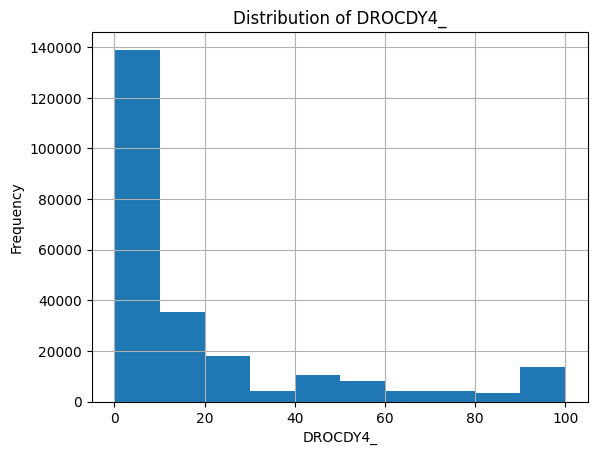

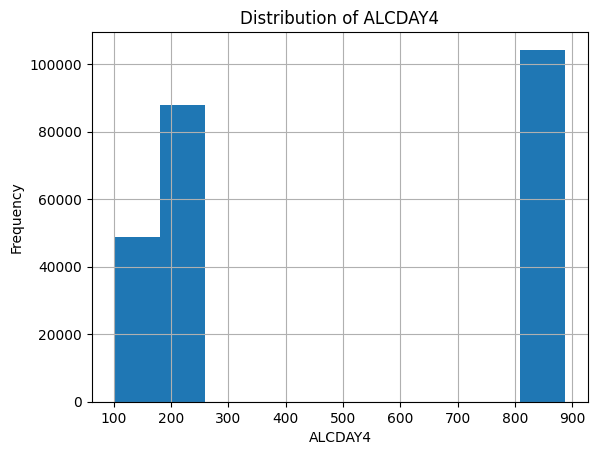

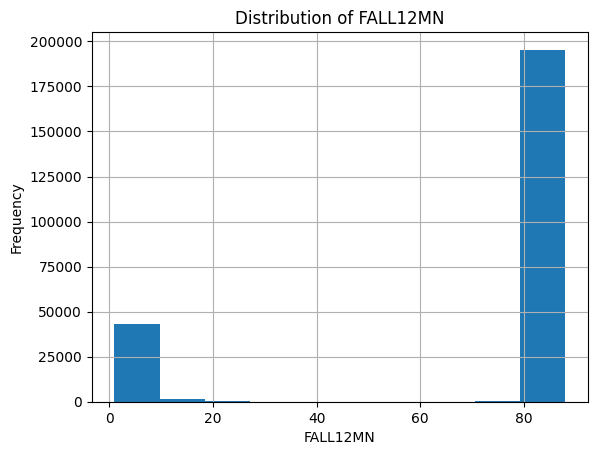

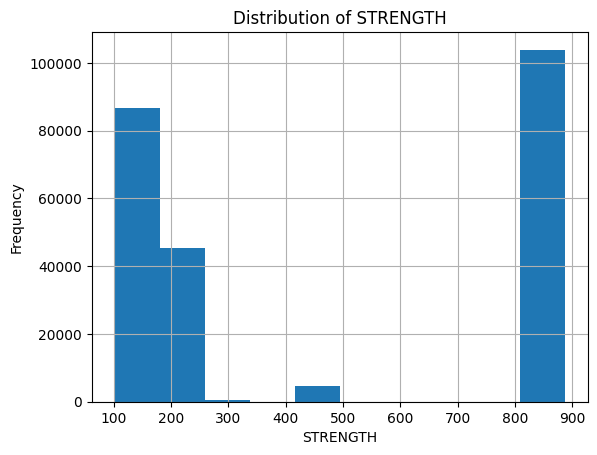

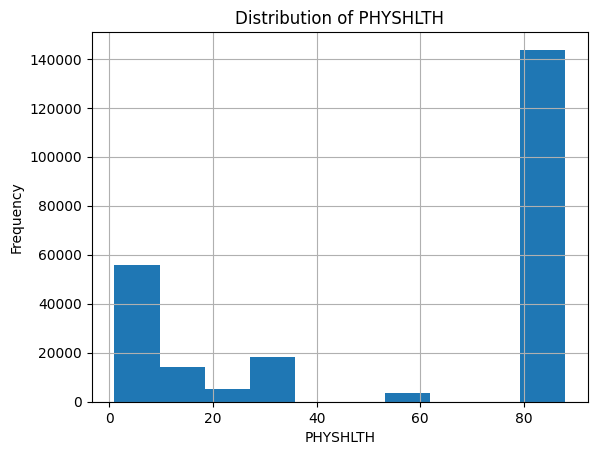

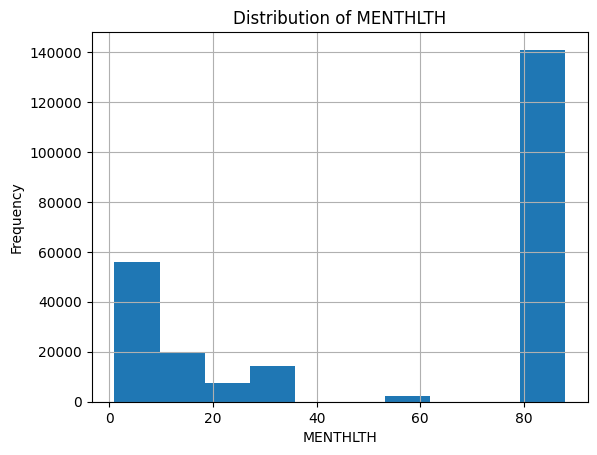

In [107]:
# Histograms for numerical features
import matplotlib.pyplot as plt

num_cols = [col for col in new_df.columns if new_df[col].nunique() > 15 and new_df[col].dtype in [np.int64, np.float64, 'object']]

for col in num_cols:
    new_df.hist(column=col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

<Axes: title={'center': ' Target variable distribution'}, xlabel='Diabetes', ylabel='count'>

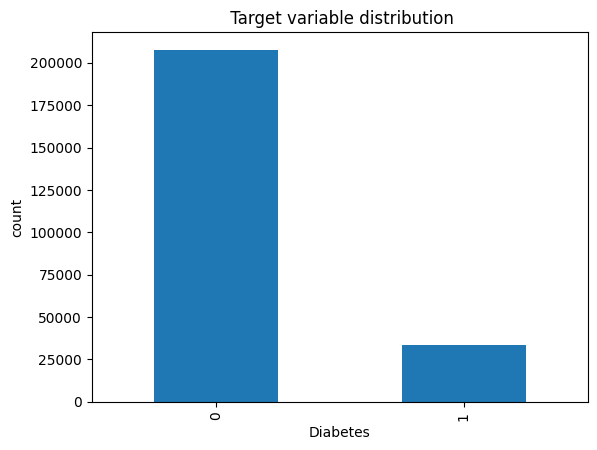

In [108]:
# Distribution for the target variable
target_var= new_df['Diabetes']
target_col='Diabetes'
target_var.value_counts().plot(kind='bar', xlabel='Diabetes', ylabel='count', title=' Target variable distribution')


#### Class Imbalance
The target variable is imbalanced, with far fewer cases of diabetes (Class 1).
This imbalance can lead to misleading performance metrics if not addressed.
During model training, stratified splitting and class-balancing techniques will be used to maintain fairness and model performance.

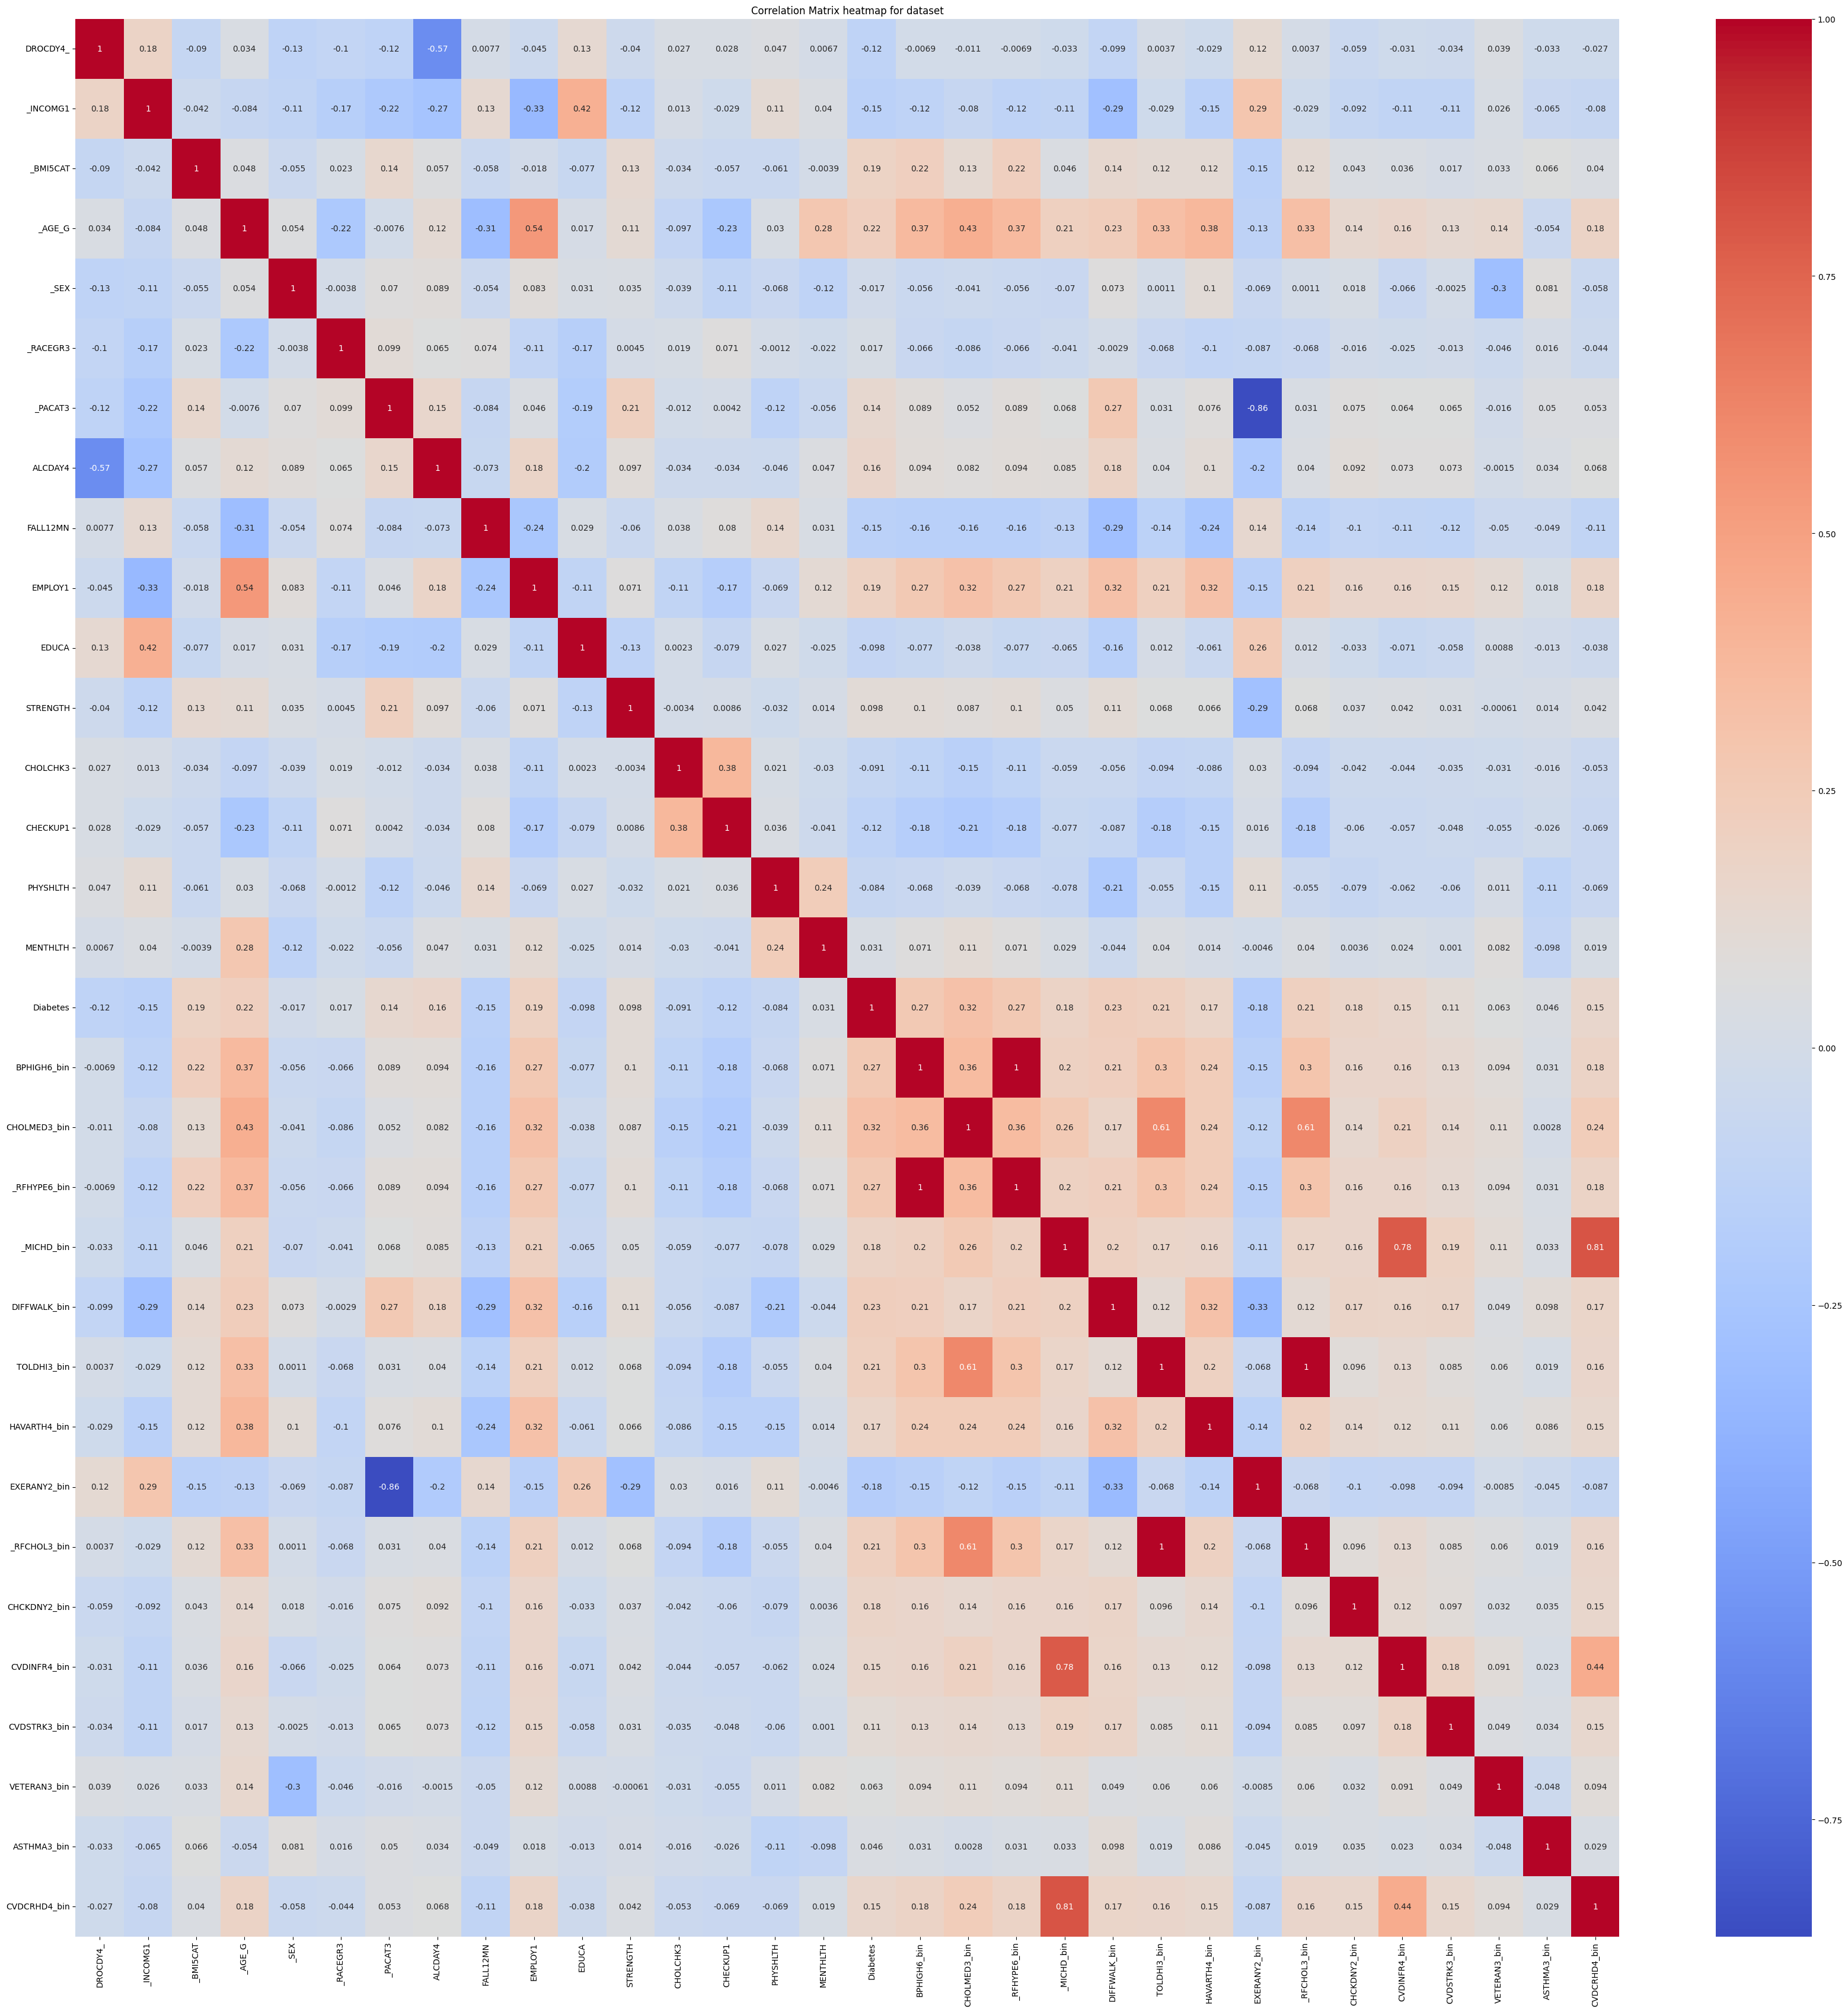

<Figure size 640x480 with 0 Axes>

In [109]:
import seaborn as sns

plt.figure(figsize=(42, 42))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix heatmap for dataset')
plt.show()
plt.savefig("output/corr_heatmap.png")


### Additional Feature Selection Decisions Based on Correlation, Mutual Information, and Missingness
Features with high correlations were reviewed alongside mutual information scores, domain knowledge, and missing value patterns. The following decisions were made to reduce multicollinearity while preserving predictive strength:

- **Dropped `DROCDY4_`** in favour of `ALCDAY4`, which had stronger signal and same missing rate.
- **Dropped `BPHIGH6_bin`** in favour of `_RFHYPE6_bin`, which had same values.
- **Dropped `CVDINFR4_bin `** in favour of `_MICHD_bin`, had higher correlation and MI, suggesting stronger predictive relevance.
- **Dropped `CVDCRHD4_bin`** in favour of `_MICHD_bin`, had higher correlation and MI, suggesting stronger predictive relevance.
- **Dropped `_PACAT`** in favour of `EXERANY2_bin`, which had stronger signal and same missing rate.
- **Dropped `EMPLOY1`** in favour of `_AGE_G`, which had both higher correlation and mutual information.
- **Dropped `TOLDHI3_bin`** and **`_RFCHOL3_bin`** in favour of `CHOLMED3_bin`, as cholesterol medication had higher correlation and MI, suggesting stronger predictive relevance.

These steps reduced redundancy while preserving the most predictive and interpretable variables.

Note: multicollinearity exist when two or more independent variables have a strong linear relationship. This leads to redundancy making isolating the individual contribution of each feature challlenging

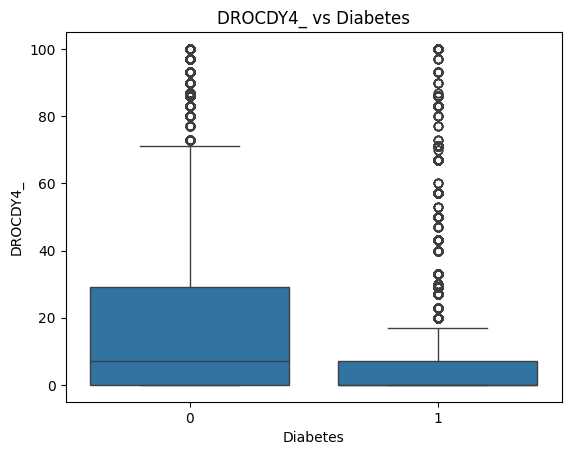

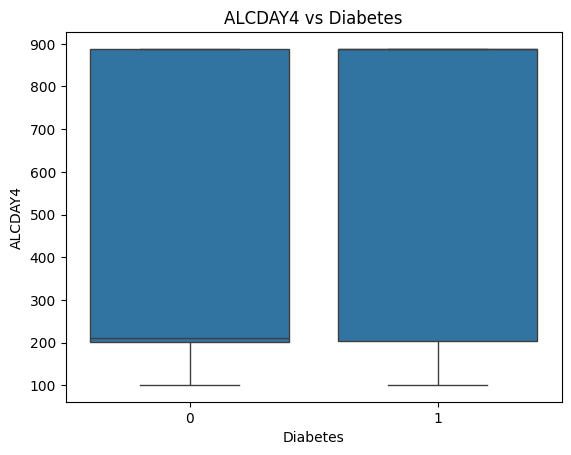

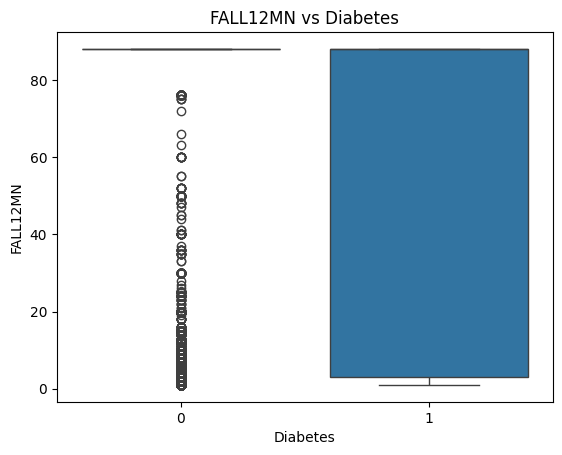

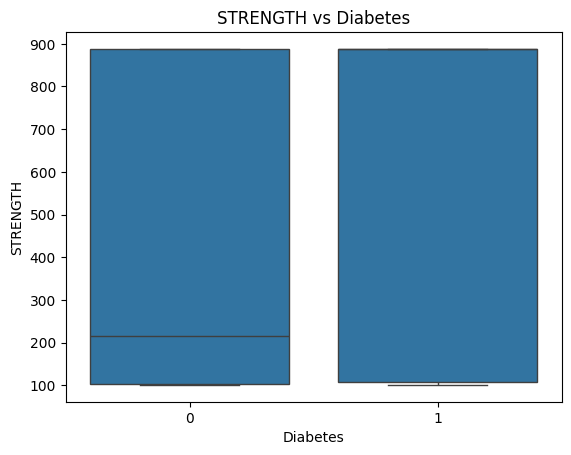

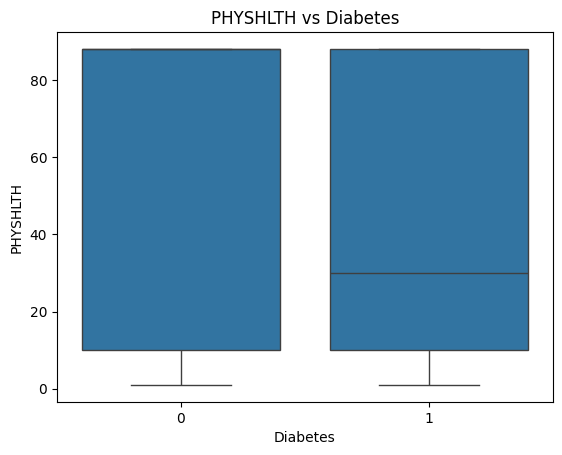

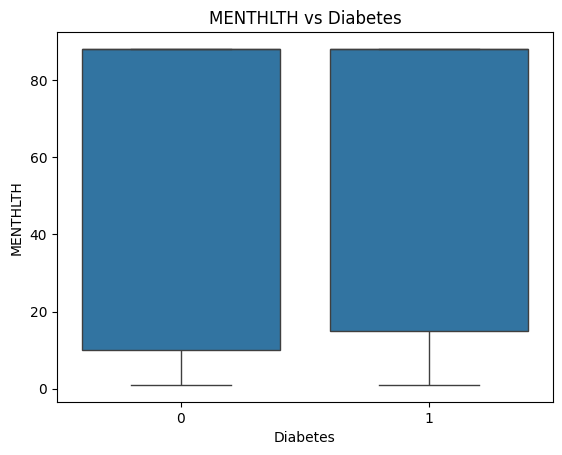

In [33]:
for col in num_cols:    
   
    sns.boxplot(data=new_df, x=target_var, y=col)
    plt.title(f'{col} vs {target_col}')
    plt.show()

In [34]:
# Create binary features based on interpretation from box plot and histogram 
bin_feature=['STRENGTH', 'ALCDAY4' ]
for col in bin_feature:
    new_df[f'{col}_Bin'] = new_df[col].apply(
        lambda x: 1 if (100 <= x <= 299) else (0 if x == 888 else np.nan) 
    )


new_df['FALL12_BIN'] = new_df['FALL12MN'].apply(lambda x: 1 if (1 <= x <= 76) else (0 if x == 88 else np.nan))

columns_to_remap = {
    'ALCDAY4_Bin': {'yes': 1, 'no': 0},
    'STRENGTH_Bin': {'yes': 1, 'no': 0},
    'FALL12_BIN': {'yes': 1, 'no': 0},
}

def clean_health_days(col):
    return col.apply(lambda x: 0 if x == 88 else np.nan if x in [77, 99] else x)

# Apply to both
new_df['PHYSHLTH'] = clean_health_days(new_df['PHYSHLTH'])
new_df['MENTHLTH'] = clean_health_days(new_df['MENTHLTH'])


In [35]:
print(cat_cols) 

['_INCOMG1', '_BMI5CAT', '_AGE_G', '_SEX', '_RACEGR3', '_PACAT3', 'EMPLOY1', 'EDUCA', 'CHOLCHK3', 'CHECKUP1', 'Diabetes', 'BPHIGH6_bin', 'CHOLMED3_bin', '_RFHYPE6_bin', '_MICHD_bin', 'DIFFWALK_bin', 'TOLDHI3_bin', 'HAVARTH4_bin', 'EXERANY2_bin', '_RFCHOL3_bin', 'CHCKDNY2_bin', 'CVDINFR4_bin', 'CVDSTRK3_bin', 'VETERAN3_bin', 'ASTHMA3_bin', 'CVDCRHD4_bin']


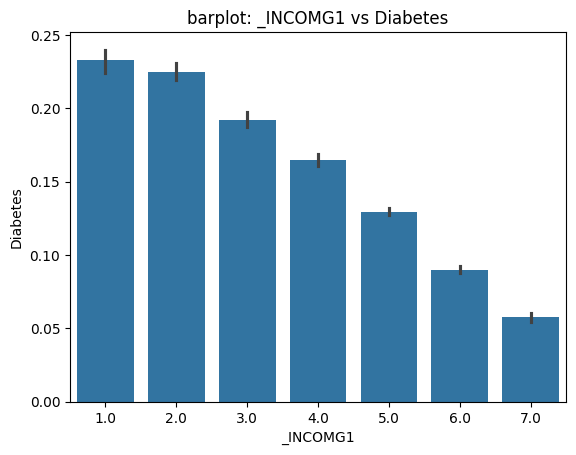

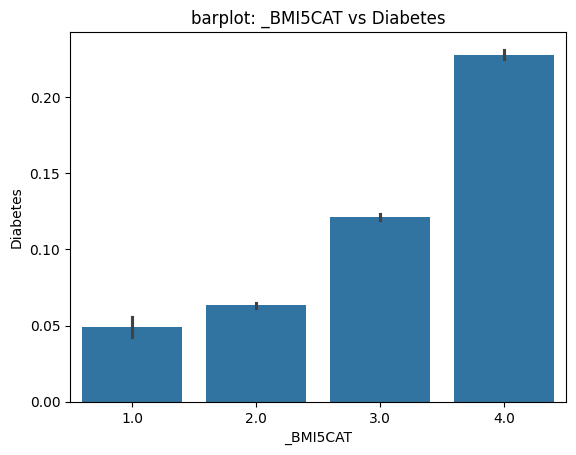

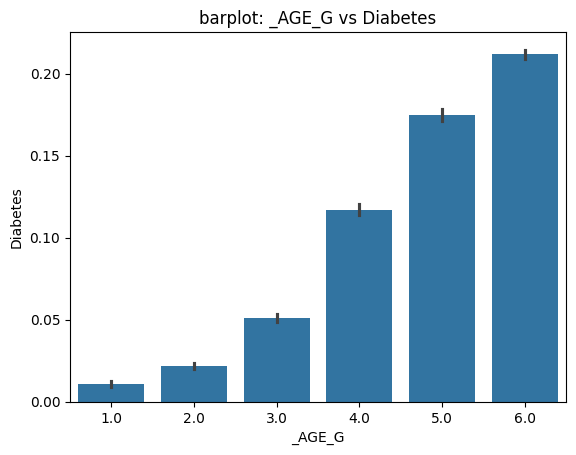

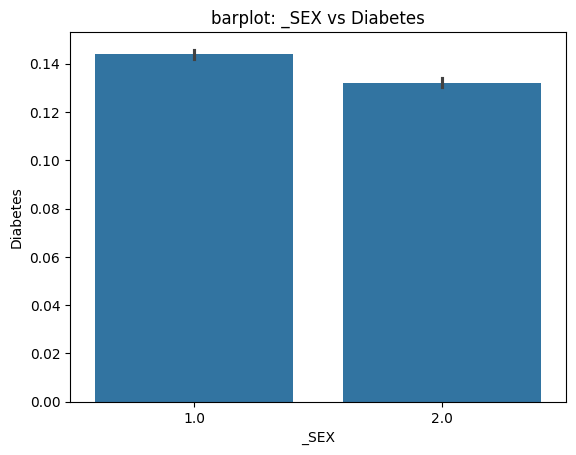

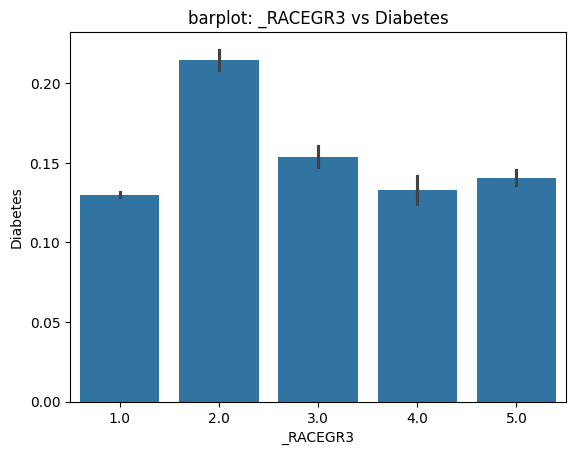

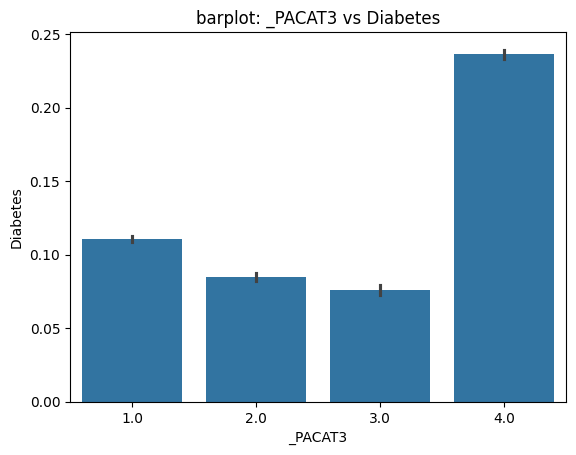

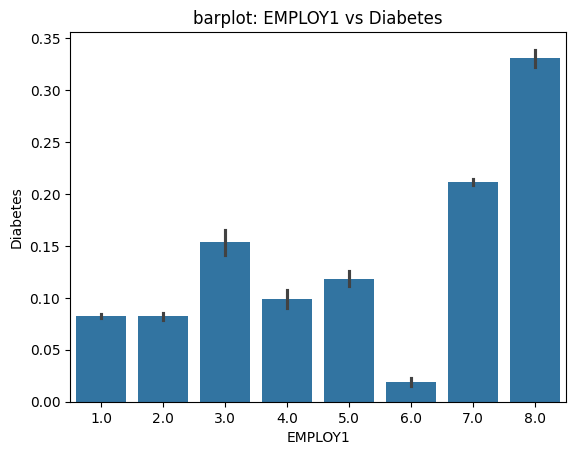

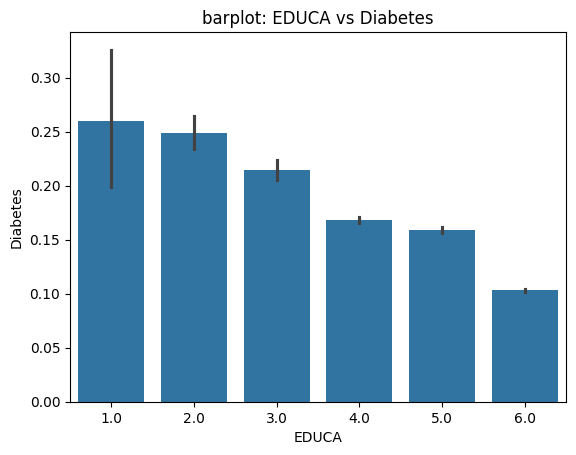

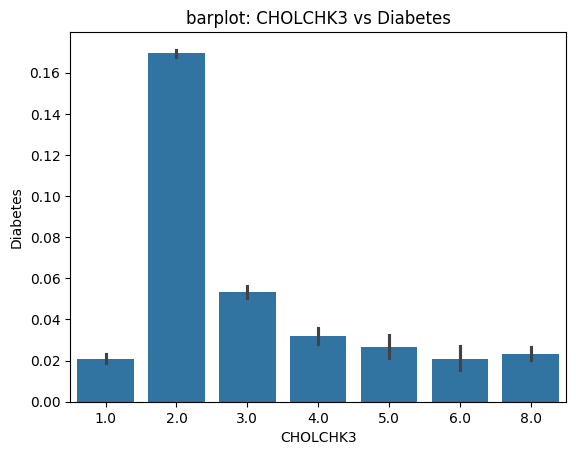

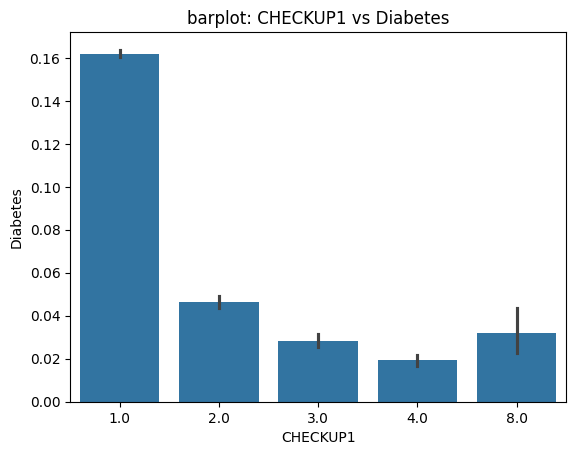

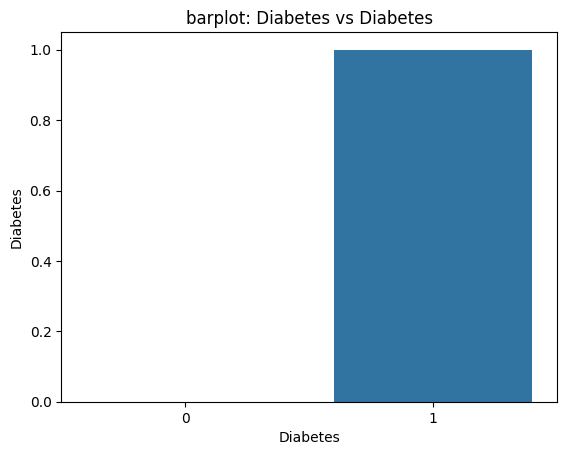

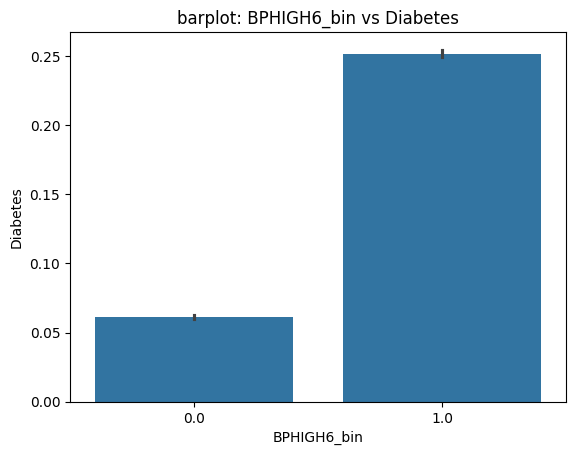

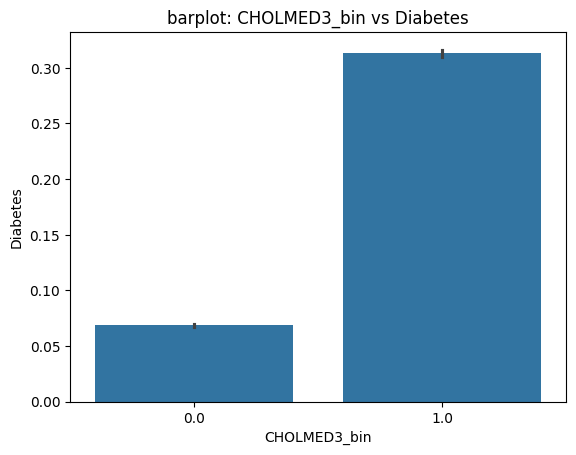

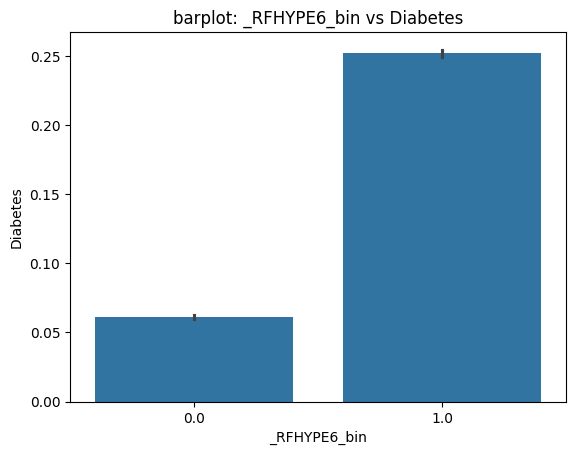

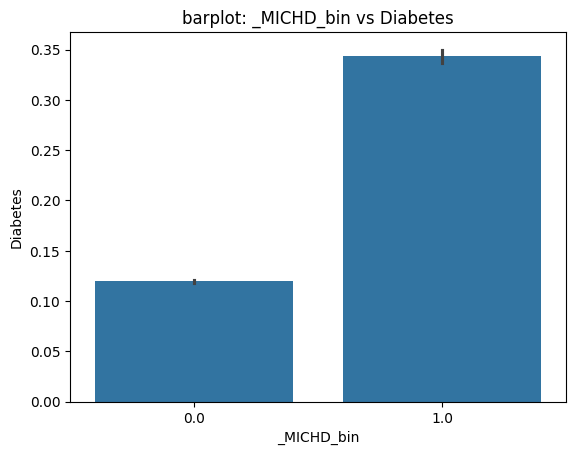

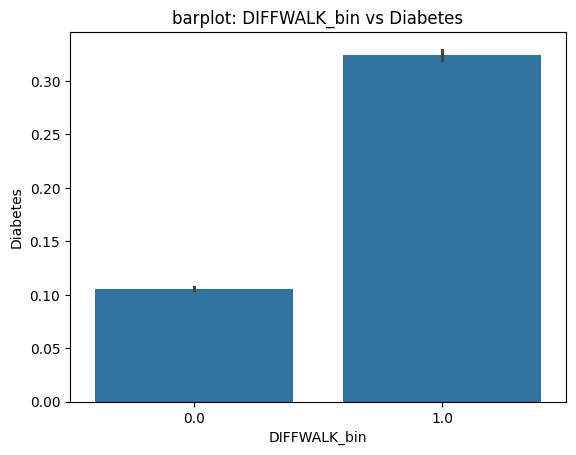

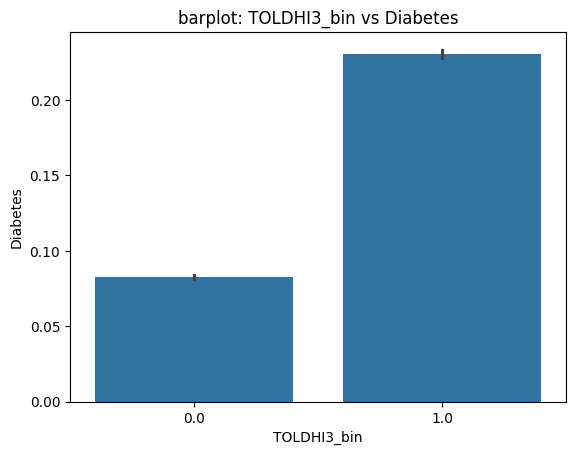

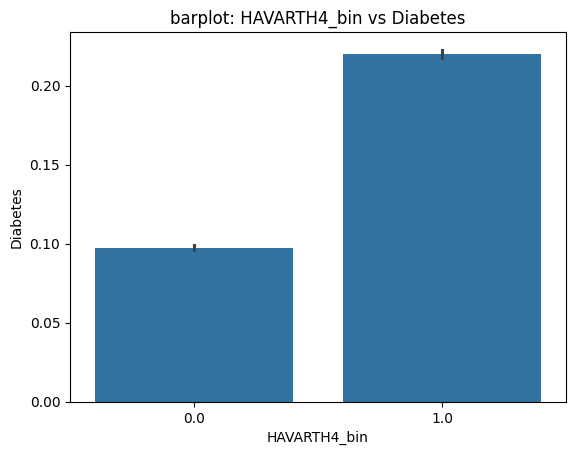

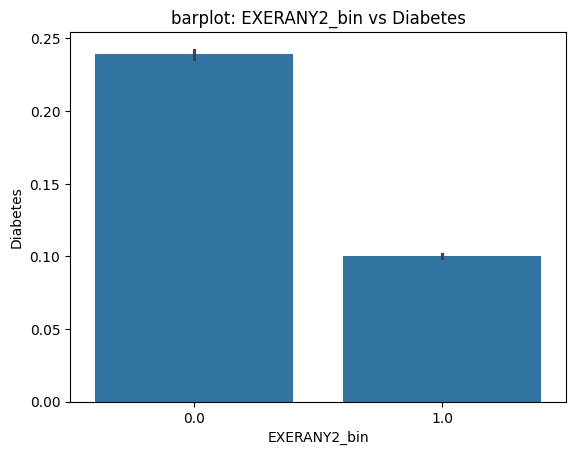

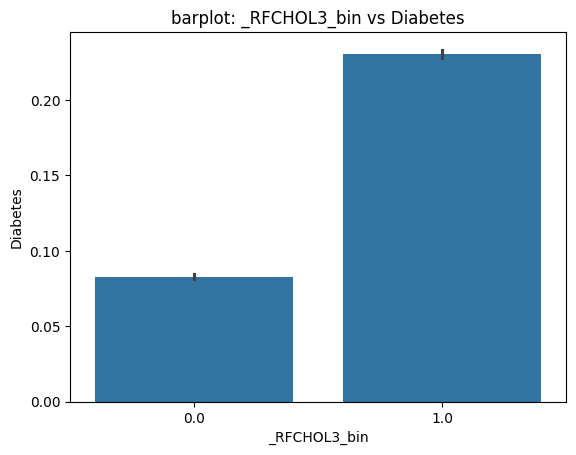

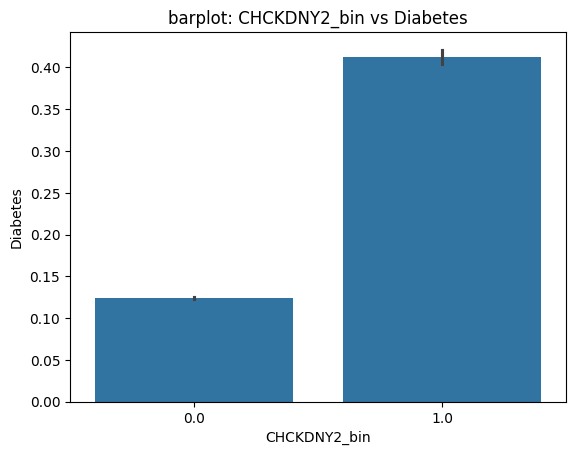

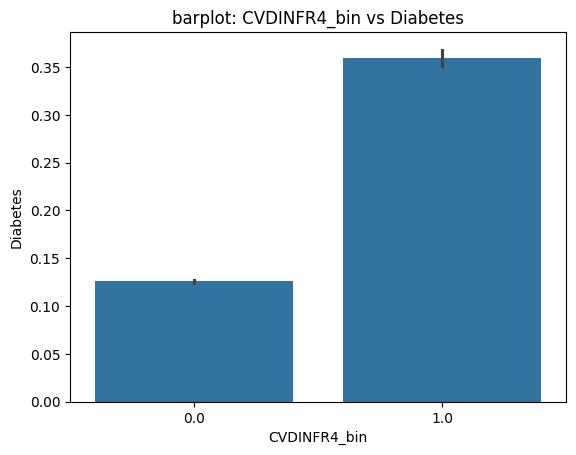

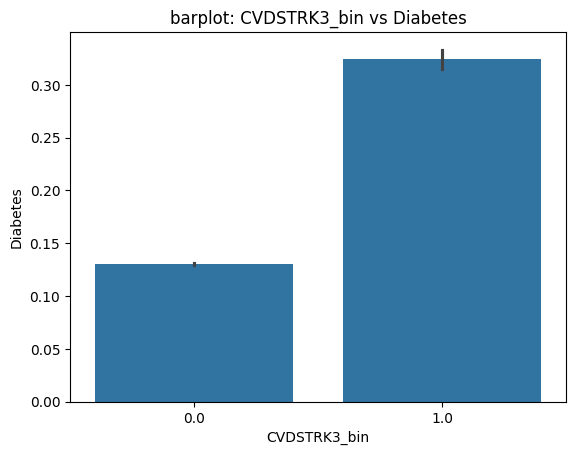

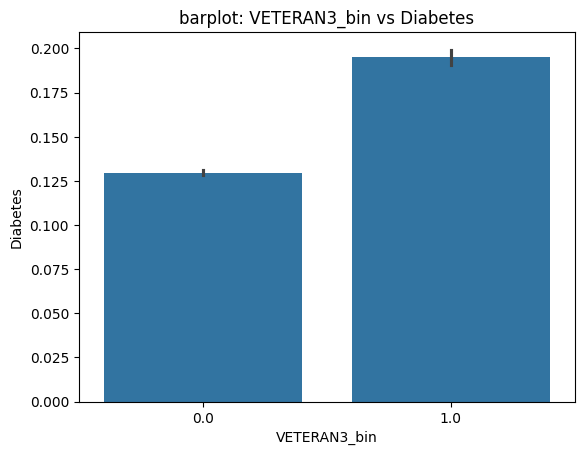

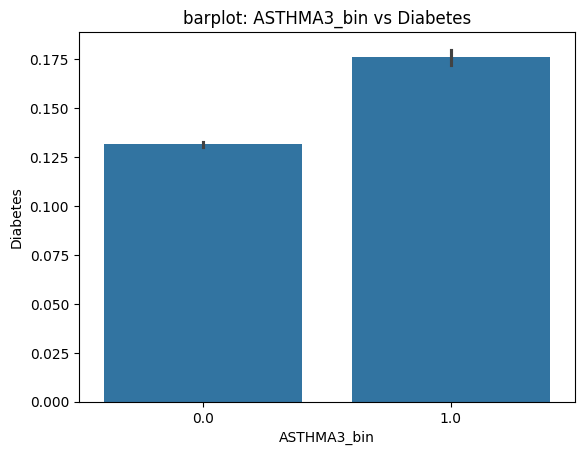

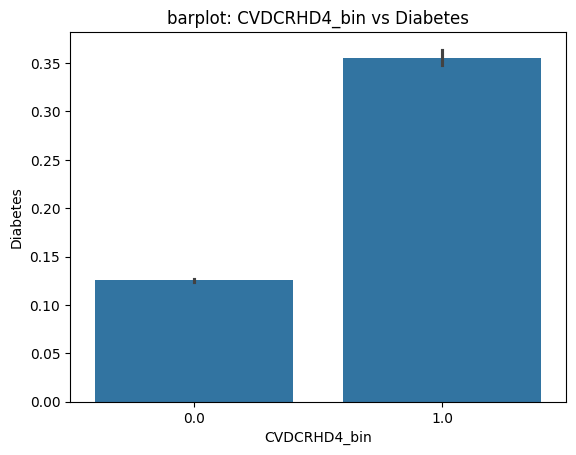

In [36]:
for col in cat_cols:
    sns.barplot(data=new_df, x=col, y=target_var)
    plt.title(f'barplot: {col} vs {target_col}')
    plt.show()

## Binary Feature Engineering
### Binary Health-Related Categorical Features
Several health-related categorical features were transformed into binary indicators:

- `1` = Yes / Has condition or behaviour
- `0` = No / Does not have condition or behaviour  

Invalid responses (e.g., "Don’t know", "Refused", pregnancy-only conditions) were excluded.

#### Observations:
- Diabetes prevalence was consistently higher among individuals with the condition or behaviour (1).
- Examples:
  - Cholesterol medication users: ~30% vs ~6% (non-users)
  - Ever diagnosed with CHD/MI: ~35% vs ~12%
  - Told they had high blood pressure: ~25% vs ~6%

These gaps indicate that such features are **strong predictors of diabetes** and likely reflect **underlying risk factors**.

#### Conclusion:
Binary features with sufficient frequency and strong separation from the target were retained for modelling, as they contribute clinically and behaviourally relevant signals.




In [37]:
# Drop columns base on EDA
drop_col=['DROCDY4_', 'BPHIGH6_bin', 'CVDINFR4_bin', 'CVDCRHD4_bin', '_PACAT3', 'TOLDHI3_bin', 'EMPLOY1', '_RFCHOL3_bin','ASTHMA3_bin', 'VETERAN3_bin' ]

new_df.drop(columns=drop_col, inplace=True)

## Feature Transformations
#### ***`_AGE_G`*** – Age Group Rebinning

Original 6 categories were merged into 4:
- 0 = 18–44 years
- 1 = 45–54 years
- 2 = 55–64 years
- 3 = 65+ years

This preserves the monotonic diabetes prevalence trend while simplifying modelling.

#### ***`CHOLCHK3`*** – Cholesterol Check Recency

Recoded into:
- Never
- Past Year
- More than 1 Year

Diabetes rates were highest among those who had never checked their cholesterol.

#### `CHECKUP1` – Time Since Last Routine Checkup
- Highest rates among those checked within the past year (likely due to diagnostic bias).
- Lowest among those who never had a checkup (possibly undiagnosed cases).
- Retained as an informative behavioural indicator.

#### One-Hot Encoding:
The ***`_RACEGR3`*** feature was one-hot encoded because it is nominal with no natural ordering. This ensures the model does not incorrectly assume ordinal relationships between categories.
Encoding was done using pd.get_dummies() with drop_first=True to avoid the dummy variable trap.


#### Additionally
Post-Transformation Re-Check:
Features transformed based on EDA findings were re-examined.

- Recomputed bar plots, mutual information (MI), and correlation (corr) with the target variable.
- Purpose: verify whether the transformations improved predictive signal and consistency with domain expectations.

In [38]:
def bin_age(age_code):
    if age_code in [1, 2, 3]: return 0  # 18–44
    elif age_code == 4: return 1        # 45–54
    elif age_code == 5: return 2        # 55–64
    elif age_code == 6: return 3        # 65+
    else: return np.nan
new_df['AGE_cat'] = new_df['_AGE_G'].apply(bin_age)

In [39]:
# Recode CHOLCHK3 into integer bins
def recode_cholchk3_int(val):
    if val == 1:
        return 0  # Never
    elif val == 2:
        return 1  # Past Year
    elif val in [3, 4, 5, 6, 8]:
        return 2  # More than 1 Year
    else:
        return np.nan  # 7, 9, or missing

new_df['CHOLCHK3_bin'] = new_df['CHOLCHK3'].apply(recode_cholchk3_int)


In [40]:
def recode_checkup(val):
    if val == 1:
        return 0  # Past Year
    elif val in [2, 3]:
        return 1  # 1–5 Years Ago
    elif val in [4, 8]:
        return 2  # 5+ Years or Never
    else:
        return np.nan  # Don't know / Refused

new_df['CHECKUP1_bin'] = new_df['CHECKUP1'].apply(recode_checkup)


In [41]:
# save df before encoding '_RACEGR3' will be used later for fairness check
df_full_race = new_df.copy()

In [42]:
# one-hot encoding
features_onehot= [ '_RACEGR3'] 
new_df = pd.get_dummies(new_df, columns=features_onehot, drop_first=True)

# remapping sex for simplicity
new_df["_SEX"] = new_df["_SEX"].map({1: 0, 2: 1})  # Male=0, Female=1

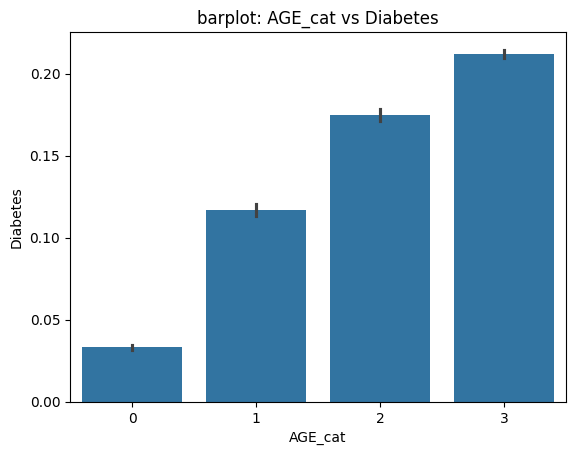

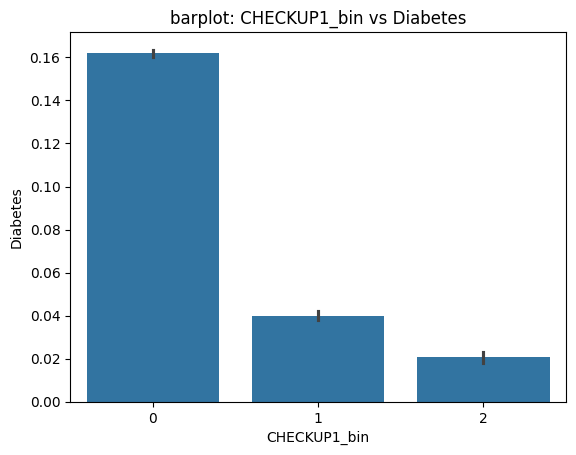

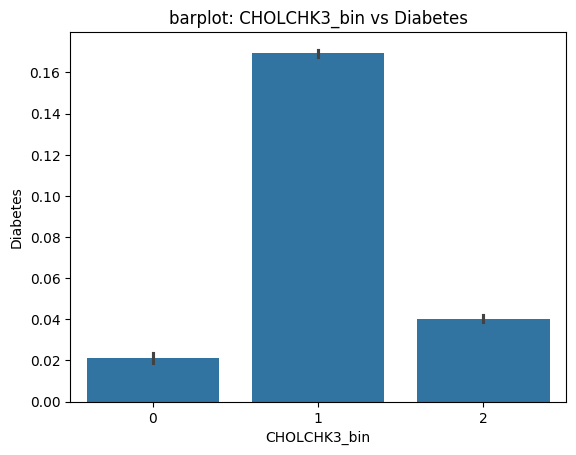

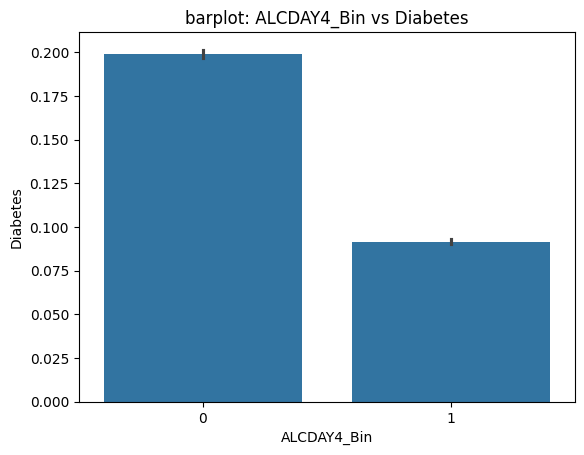

In [43]:
new_cols=['AGE_cat', 'CHECKUP1_bin', 'CHOLCHK3_bin', 'ALCDAY4_Bin']
for col in new_cols:
    sns.barplot(data=new_df, x=col, y=target_var)
    plt.title(f'barplot: {col} vs {target_col}')
    plt.show()

In [44]:
# Recheck MI and corr to see if feature transformation improved results
# Compute correlation matrix once
corr = new_df.corr(numeric_only=True)

for col in new_cols:
    if new_df[col].dtype != 'O': 
        nulls = new_df[col].isnull().sum()
        skewness = new_df[col].skew()
        if col in corr.index:
            corr_val = corr['Diabetes'].get(col, 'N/A') 
        else:
            corr_val = 'N/A'
        print(f"{col}:  corr={corr_val}")


# Prepare X and y
X = new_df.drop('Diabetes', axis=1)
y = new_df['Diabetes']

# Temporarily fill nulls 
X_filled = X.fillna(-999)  

# Compute mutual information scores
mi_scores = mutual_info_classif(X_filled, y, discrete_features='auto')

# Create a dataframe for sorting
mi_df = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi_df.head(50))  # Top 50 most informative features



AGE_cat:  corr=0.21536464962252377
CHECKUP1_bin:  corr=-0.13820138554672082
CHOLCHK3_bin:  corr=-0.06937470880091766
ALCDAY4_Bin:  corr=-0.15483904084804018
EXERANY2_bin    0.055849
CHOLMED3_bin    0.053759
_RFHYPE6_bin    0.052050
FALL12MN        0.049379
CHOLCHK3_bin    0.049023
ALCDAY4_Bin     0.048532
AGE_cat         0.042783
CHECKUP1        0.040104
_AGE_G          0.037468
CHOLCHK3        0.035456
_BMI5CAT        0.032915
_SEX            0.030614
ALCDAY4         0.030175
HAVARTH4_bin    0.024571
DIFFWALK_bin    0.022530
STRENGTH        0.021703
EDUCA           0.019486
_INCOMG1        0.018686
CHECKUP1_bin    0.014774
FALL12_BIN      0.014632
PHYSHLTH        0.014312
_MICHD_bin      0.013650
CHCKDNY2_bin    0.010995
CVDSTRK3_bin    0.005693
STRENGTH_Bin    0.003977
MENTHLTH        0.002567
_RACEGR3_2.0    0.002105
_RACEGR3_3.0    0.001359
_RACEGR3_5.0    0.000707
_RACEGR3_4.0    0.000365
dtype: float64


In [ ]:
final_drop = ['_AGE_G', 'CHECKUP1', 'CHOLCHK3', 'ALCDAY4', 'FALL12_BIN', 'STRENGTH_Bin']
new_df.drop(columns=final_drop, inplace=True)

# save final df 
new_df.to_csv("data/final_dataset.csv", index=False)

## Feature Selection
Feature selection was conducted in two phases:

1. Filter Methods (from EDA)
    - Used correlation and mutual information to guide dropping of redundant or irrelevant features.
    -  Decisions were informed by domain knowledge and the BRFSS codebook.
2. Embedded Method — Random Forest Feature Importances
    - Trained a RandomForestClassifier to capture both main effects and interactions.
    - Notable findings: `STRENGTH` and `PHYSHLTH` ranked highly despite lower MI scores.
##### Final Decision:
All **24 engineered features** were retained in the modelling dataset.

Retaining sensitive attributes allows fairness analysis.

Supports both predictive performance and responsible, bias-aware modelling.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, RFE, chi2 
from sklearn.ensemble import RandomForestClassifier

In [47]:
x_feat = new_df.drop(columns='Diabetes', axis=1)


rfc = RandomForestClassifier()
rfc.fit(x_feat, target_var)
importances =  rfc.feature_importances_

feature_impor= pd.Series(importances, index=x_feat.columns)
print(feature_impor.sort_values(ascending=False))


STRENGTH        0.117103
_INCOMG1        0.100422
PHYSHLTH        0.097167
MENTHLTH        0.084518
EDUCA           0.072282
CHOLMED3_bin    0.068835
AGE_cat         0.056136
FALL12MN        0.051119
_BMI5CAT        0.047506
_RFHYPE6_bin    0.039393
_SEX            0.030553
HAVARTH4_bin    0.030480
DIFFWALK_bin    0.027465
ALCDAY4_Bin     0.023980
EXERANY2_bin    0.023645
_MICHD_bin      0.019781
CHCKDNY2_bin    0.018252
_RACEGR3_2.0    0.015721
CHOLCHK3_bin    0.014911
CVDSTRK3_bin    0.014799
_RACEGR3_5.0    0.014099
CHECKUP1_bin    0.012735
_RACEGR3_3.0    0.012139
_RACEGR3_4.0    0.006960
dtype: float64


## Dataset Split & Stratification

- **Target**: Diabetes (DIABETE4).
- **Split**: Train 70%, Validation 20%, Test 10% (held out for final + fairness evaluation).
- **Stratified sampling** used in both splits to preserve class imbalance.
- All preprocessing and tuning are learned on train only; validation/test are never used for fitting.

### Feature Scaling (Logistic Regression)
- A *`ColumnTransformer`* standardises numeric features with StandardScaler.
- Binary/one-hot features pass through unchanged.
- Scaling is fit on train, then applied to val/test via the pipeline to avoid leakage.

### Per-Model Evaluation (on Validation)
- Confusion matrix, precision, recall, F1, ROC-AUC, PR-AUC.
- Threshold-based metrics reported at 0.5; PR/ROC curves shown across thresholds.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


num_features = ['FALL12MN', 'MENTHLTH', 'PHYSHLTH', 'STRENGTH']  
cat_features = ['_SEX', 'DIFFWALK_bin', '_INCOMG1', '_RACEGR3_5.0', 'EDUCA', 'CHOLMED3_bin', 'AGE_cat', '_BMI5CAT', '_RFHYPE6_bin','HAVARTH4_bin','EXERANY2_bin','ALCDAY4_Bin',    
            '_MICHD_bin','CHCKDNY2_bin', '_RACEGR3_2.0','CHOLCHK3_bin', 'CVDSTRK3_bin', '_RACEGR3_3.0' , 'CHECKUP1_bin','_RACEGR3_4.0'  ] 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', 'passthrough', cat_features)  # leave binary features untouched
    ]
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l2', max_iter=1000, class_weight='balanced'))    # Baseline model using l2 norm penalty to reduce overfitting while keeping all features
])


# Stratified split: Train (70%), Eval (30%)
X_train, X_eval, y_train, y_eval = train_test_split(
    x_feat, target_var, test_size=0.3, random_state=42, stratify=target_var
)

X_val, X_test, y_val, y_test,  = train_test_split(
    X_eval, y_eval, test_size=1/3, random_state=42, stratify=y_eval
)

   
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [49]:
from sklearn.metrics import accuracy_score

y_val_pred = pipeline.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_val_pred))


Accuracy: 0.7507472600464962


The classification report below: 
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     41525
           1       0.33      0.78      0.46      6651

    accuracy                           0.75     48176
   macro avg       0.64      0.76      0.65     48176
weighted avg       0.87      0.75      0.79     48176


This is the roc_auc score:  0.7632342422513497


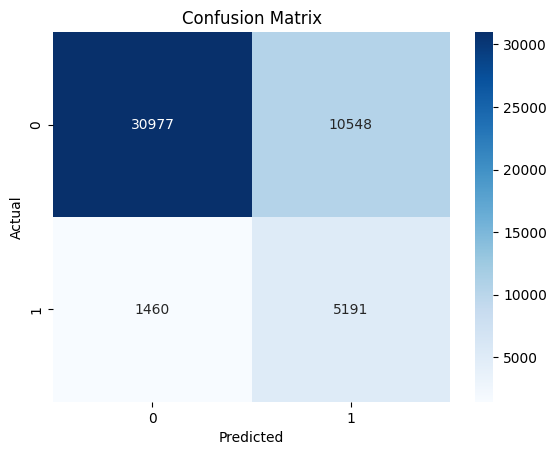

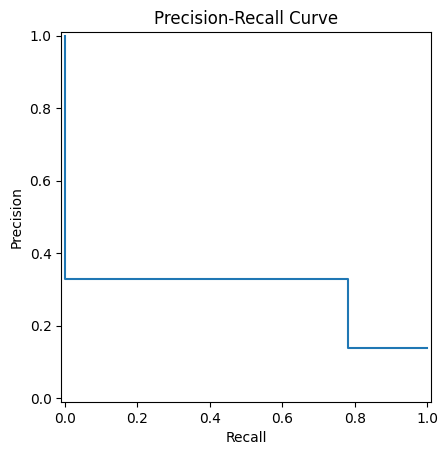

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay #, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

# Detailed classification metrics
print('The classification report below: ')
print(classification_report(y_val, y_val_pred))
print()
print('This is the roc_auc score: ', roc_auc_score(y_val, y_val_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

precision, recall, thresholds = precision_recall_curve(y_val, y_val_pred)

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()



### Interpretation of Logistic Regression Results

**Precision (Positive Predictive Value)**: Measures how many of the cases the model predicted as “Yes” (diabetic) were actually correct. Formula: TP / (TP + FP)

**Recall (Sensitivity)**: Measures how many of the actual diabetic cases the model successfully identified. Formula: TP / (TP + FN)

In this context:

The precision for predicting diabetes is relatively low (~33%), meaning that only one-third of the positive predictions were correct. This indicates a high false positive rate.

The *recall* is much higher (~77%), which is crucial in medical diagnosis, where it is more important to catch as many true positive cases as possible — even if it means raising some false alarms.

#### Medical Relevance
In medical diagnosis, *recall* is typically prioritised over precision. Missing a diabetic case (false negative) can delay treatment and cause complications. A high-recall, low-precision model casts a wider net - ensuring most true diabetics are flagged for further examination, even if more non-diabetics are flagged in error.

#### Model Behaviour
- Class Preference: Still favours the majority class (non-diabetic) despite class weighting.
- Signs of Underfitting: Mild underfitting possible due to the simplicity of logistic regression and the dataset imbalance.
- PR Curve:
    - Flat sections = few high-precision thresholds.
    - Steep drop after recall=0 → very few high-confidence positives.
#### Class Imbalance Handling
Initially, performance on the minority class was poor. ***class_weight='balanced'*** to improve minority-class performance:
- Recall (class 1): from ~23% → 77%
- F1-score (class 1): from ~0.32 → 0.46
- Weighted F1: from ~0.67 → 0.79

Although accuracy slightly dropped, recall and F1 improved significantly, making the model more balanced and fairer for real-world healthcare use.
#### Implementation Notes
- **Pipeline**: ColumnTransformer scales numeric features with StandardScaler and passes categorical/binary features unchanged.
- **Model**: Logistic Regression with L2 penalty (penalty='l2', max_iter=1000).

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import  make_scorer, fbeta_score

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

fbeta_scorer = make_scorer(fbeta_score, beta=2, zero_division=0)        # Avoids crashes if a fold predicts one class

param_grid = {
    'n_estimators': [ 600, 750],
    'max_depth': [20, 10, 5],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

grid_search =  GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=None),  
    param_grid=param_grid,
    scoring= fbeta_scorer,   
    cv=cv,
    n_jobs=-1,
    verbose=1,
    error_score='raise'  
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(grid_search.best_params_)

# Evaluate on validation set
y_valrf_pred = best_model.predict(X_val)
print(classification_report(y_val, y_valrf_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 600}
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     41525
           1       0.32      0.80      0.46      6651

    accuracy                           0.74     48176
   macro avg       0.64      0.77      0.64     48176
weighted avg       0.87      0.74      0.78     48176



### Random Forest (Tuned with GridSearchCV)

Used `RandomForestClassifier` with `StratifiedKFold` cross-validation and an **F-beta score** (beta=2) to prioritise recall over precision.  
The parameter search covered `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, and `max_features`.  
The best model achieved:
- Precision (Class 1): 32%
- Recall (Class 1): 80%
- F1-score (Class 1): 46%

While recall improved slightly compared to Logistic Regression, this came at the cost of marginally reduced precision. The model still identified a high proportion of actual diabetic cases but produced slightly more false positives than Logistic Regression.


In [56]:
## Using XGBoost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer, fbeta_score

# Compute scale_pos_weight = negatives / positives (training set ONLY)
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
spw = neg / max(pos, 1)  # avoid div/0


fbeta2 = make_scorer(fbeta_score, beta=2, zero_division=0)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

param_grid = {
    'max_depth': [3,4],
    'min_child_weight': [ 1,2],
    'subsample': [ 0.6, 0.7],
    'colsample_bytree': [ 0.6, 0.7],
    'learning_rate': [0.0325, 0.25],
    'reg_alpha': [0.25, 0.5],
    'reg_lambda': [0.5, 0.3],
    'scale_pos_weight': [5, spw, 7]  
}

base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='aucpr',
    tree_method='hist',
    n_estimators=700,
    random_state=42,
    n_jobs=-1,
    max_delta_step=1
)

grid_2 = GridSearchCV(
    base, param_grid,
    scoring=fbeta2,  # or 'recall'
    cv=cv, n_jobs=-1, verbose=1
)

grid_2.fit(X_train, y_train)

print("Best params:", grid_2.best_params_)
print("cv score:", grid_2.best_score_)


Fitting 3 folds for each of 384 candidates, totalling 1152 fits
Best params: {'colsample_bytree': 0.6, 'learning_rate': 0.0325, 'max_depth': 4, 'min_child_weight': 2, 'reg_alpha': 0.5, 'reg_lambda': 0.5, 'scale_pos_weight': 7, 'subsample': 0.6}
cv score: 0.6216974979598716


In [57]:
xgb_best_model_2 = XGBClassifier(
    **grid_2.best_params_,
    objective='binary:logistic',
    eval_metric='aucpr',
    tree_method='hist',
    n_estimators=1000,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50
)


xgb_best_model_2.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=False,
)
print("Best iteration:", xgb_best_model_2.best_iteration)




Best iteration: 472


Validation Results:
              precision    recall  f1-score   support

           0      0.962     0.708     0.816     41525
           1      0.313     0.828     0.454      6651

    accuracy                          0.725     48176
   macro avg      0.638     0.768     0.635     48176
weighted avg      0.873     0.725     0.766     48176

[[29419 12106]
 [ 1147  5504]]


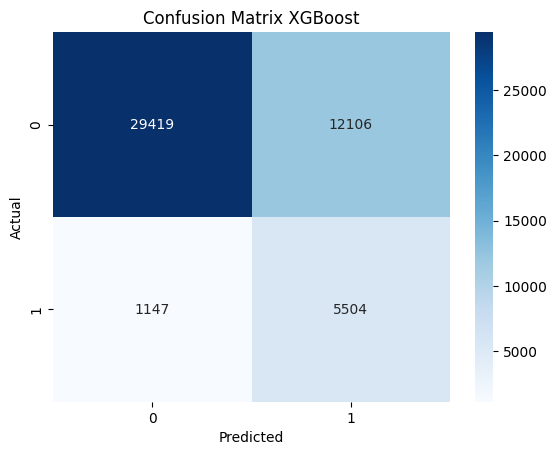

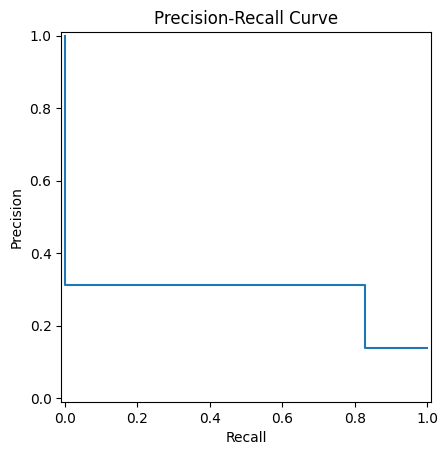

In [58]:
y_val_xgb_pred2 = xgb_best_model_2.predict(X_val)  
cm_xgb = confusion_matrix(y_val, y_val_xgb_pred2)

print("Validation Results:")
print(classification_report(y_val, y_val_xgb_pred2, digits=3))
print(confusion_matrix(y_val, y_val_xgb_pred2))

# Confusion matrix
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix XGBoost")
plt.show()

precision, recall, thresholds = precision_recall_curve(y_val, y_val_xgb_pred2)

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()

### XGBoost (Tuned with GridSearchCV)

Optimised `XGBClassifier` for recall-oriented performance using the **F-beta score** (beta=2).  
Included `scale_pos_weight` to address class imbalance. The parameter grid explored `max_depth`, `min_child_weight`, `subsample`, `colsample_bytree`, `learning_rate`, `reg_alpha`, and `reg_lambda`.  
The best configuration achieved:
- Precision (Class 1): 31.3%
- Recall (Class 1): 82.7%
- F1-score (Class 1): 45.4%

XGBoost achieved the highest recall of all tested models, at the cost of slightly reduced precision, which is acceptable in a medical screening context.


In [63]:
# import numpy as np
# import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
# import matplotlib.pyplot as plt

def fairness_by_group(y_true, y_pred, race, labels_map=None, plot=True, title="Fairness by Race", save_path=None):
    """
    y_true: 1D array-like of ground truth labels (0/1)
    y_pred: 1D array-like of predictions (0/1). If you have probabilities, threshold first.
    race:   1D array-like group labels aligned with y_true/y_pred
    labels_map: optional dict to rename race codes (e.g., {1:'White', 2:'Black', ...})
    plot: whether to draw a bar chart
    save_path: optional file path to save the plot 

    returns: pandas DataFrame with metrics per race group
    """
    df = pd.DataFrame({
        'race': race,
        'y_true': y_true,
        'y_pred': y_pred
    })
    if labels_map:
        df['race'] = df['race'].map(labels_map).fillna(df['race'])

    rows = []
    for g, sub in df.groupby('race'):
        rows.append({
            'Race Group': g,
            'Accuracy':  accuracy_score(sub['y_true'], sub['y_pred']),
            'Precision': precision_score(sub['y_true'], sub['y_pred'], zero_division=0),
            'Recall':    recall_score(sub['y_true'], sub['y_pred'], zero_division=0),
            'Support':   len(sub)
        })
    out = pd.DataFrame(rows).sort_values('Race Group')

    if plot:
        ax = out.set_index('Race Group')[['Accuracy','Precision','Recall']].plot(
            kind='bar', figsize=(9,5), ylim=(0,1), grid=True, alpha=0.9
        )
        ax.set_title(title)
        ax.set_ylabel("Score")
        plt.tight_layout()
        plt.show()

        # Save plot if path is given
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')

    return out


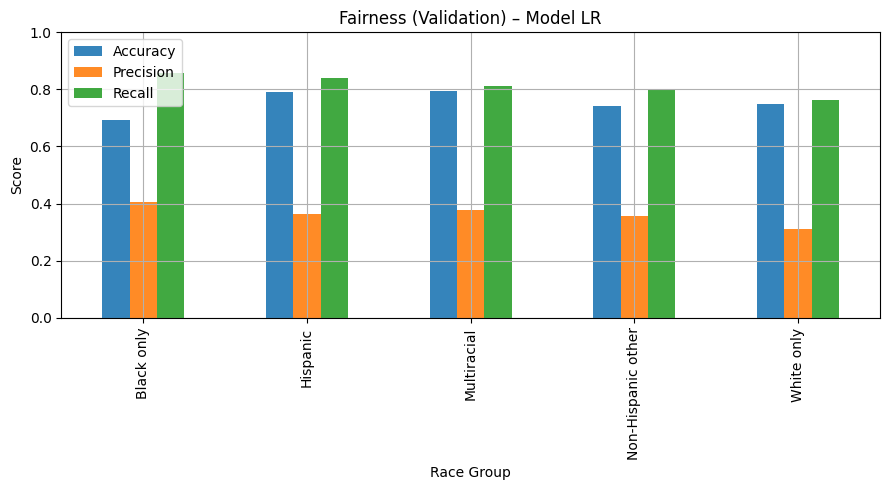

           Race Group  Accuracy  Precision    Recall  Support
0          Black only  0.691669   0.404888  0.857343     3253
1            Hispanic  0.790821   0.363095  0.841379     1133
2         Multiracial  0.794082   0.379107  0.810811     4089
3  Non-Hispanic other  0.742582   0.356044  0.798030     2595
4          White only  0.750499   0.312246  0.762319    37106


<Figure size 640x480 with 0 Axes>

In [65]:

labels_map = {1:'White only', 2:'Black only', 3:'Non-Hispanic other', 4:'Hispanic', 5:'Multiracial'} 
fair_df = fairness_by_group(y_true=y_val, y_pred=y_val_pred, race=df_full_race.loc[X_val.index, '_RACEGR3'],
                            labels_map=labels_map, plot=True,
                            title="Fairness (Validation) – Model LR", save_path="output/fairness_lr_val.png")
print(fair_df)


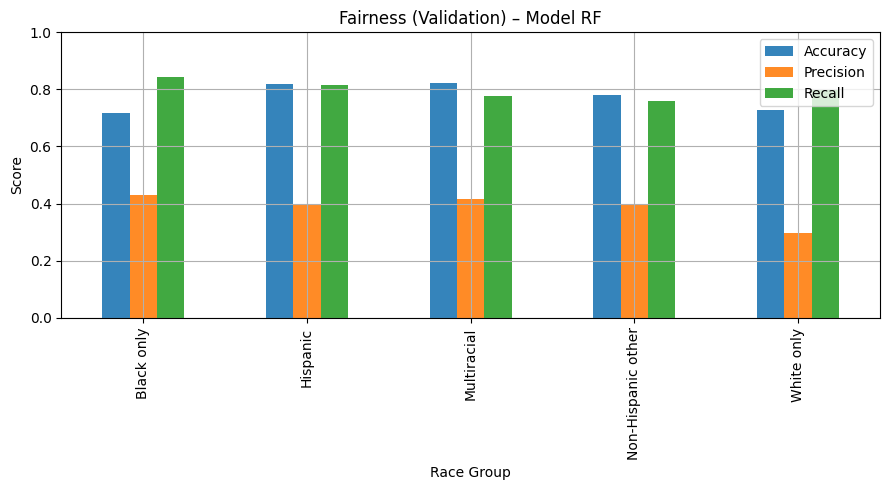

           Race Group  Accuracy  Precision    Recall  Support
0          Black only  0.718106   0.428369  0.844755     3253
1            Hispanic  0.819064   0.398649  0.813793     1133
2         Multiracial  0.822450   0.417231  0.776577     4089
3  Non-Hispanic other  0.779191   0.393359  0.758621     2595
4          White only  0.726136   0.296209  0.802277    37106


<Figure size 640x480 with 0 Axes>

In [66]:

labels_map = {1:'White only', 2:'Black only', 3:'Non-Hispanic other', 4:'Hispanic', 5:'Multiracial'} 
fair_df = fairness_by_group(y_true=y_val, y_pred=y_valrf_pred, race=df_full_race.loc[X_val.index, '_RACEGR3'],
                            labels_map=labels_map, plot=True,
                            title="Fairness (Validation) – Model RF", save_path="output/fairness_rf_val.png")
print(fair_df)


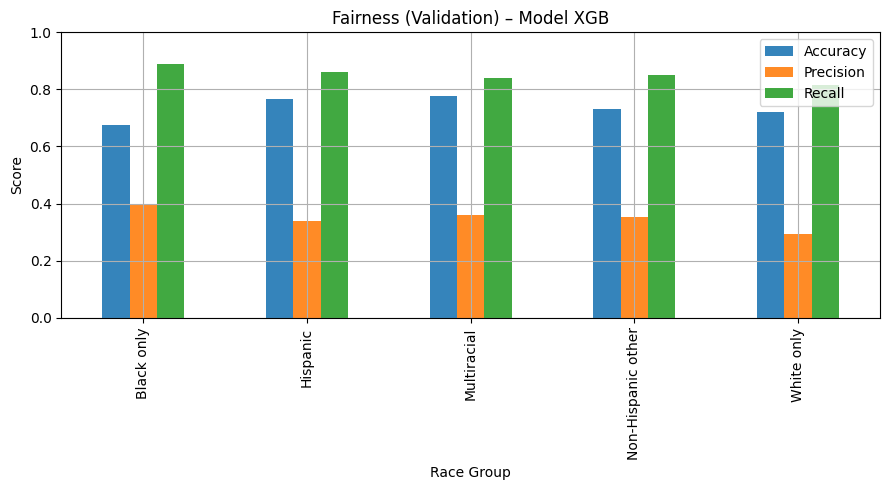

           Race Group  Accuracy  Precision    Recall  Support
0          Black only  0.674147   0.393321  0.889510     3253
1            Hispanic  0.766990   0.338753  0.862069     1133
2         Multiracial  0.775251   0.359784  0.841441     4089
3  Non-Hispanic other  0.732948   0.353122  0.849754     2595
4          White only  0.721959   0.294479  0.813872    37106


<Figure size 640x480 with 0 Axes>

In [67]:

labels_map = {1:'White only', 2:'Black only', 3:'Non-Hispanic other', 4:'Hispanic', 5:'Multiracial'} 
fair_df = fairness_by_group(y_true=y_val, y_pred=y_val_xgb_pred2, race=df_full_race.loc[X_val.index, '_RACEGR3'],
                            labels_map=labels_map, plot=True,
                            title="Fairness (Validation) – Model XGB", save_path="output/fairness_xgb_val.png")
print(fair_df)


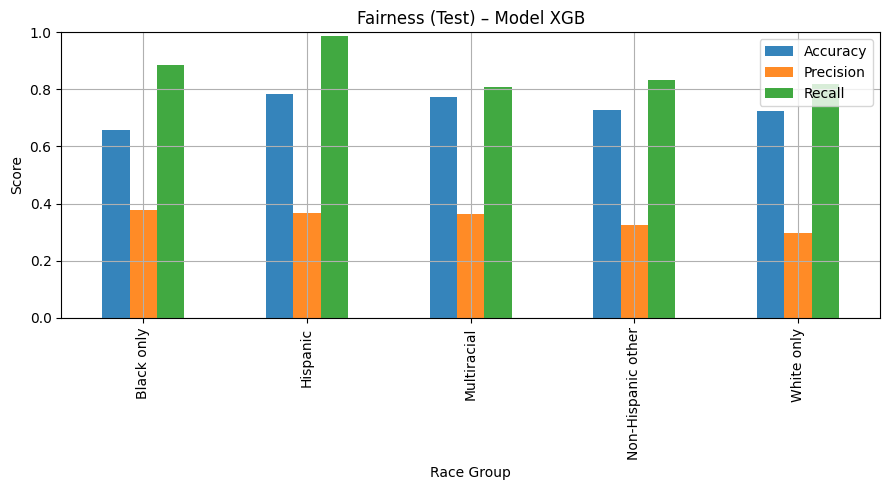

           Race Group  Accuracy  Precision    Recall  Support
0          Black only  0.657161   0.375912  0.885387     1613
1            Hispanic  0.784348   0.365979  0.986111      575
2         Multiracial  0.774163   0.363499  0.808725     2121
3  Non-Hispanic other  0.726829   0.325991  0.831461     1230
4          White only  0.724136   0.298561  0.820091    18549


<Figure size 640x480 with 0 Axes>

In [68]:

y_test_pred_xgb = xgb_best_model_2.predict(X_test)


labels_map = {1:'White only', 2:'Black only', 3:'Non-Hispanic other', 4:'Hispanic', 5:'Multiracial'}  
fair_df = fairness_by_group(y_true=y_test, y_pred=y_test_pred_xgb, race=df_full_race.loc[X_test.index, '_RACEGR3'],
                            labels_map=labels_map, plot=True,
                            title="Fairness (Test) – Model XGB", save_path="output/fairness_xgb_test.png")
print(fair_df)


Accuracy:  0.726
F1-score:  0.455
ROC-AUC:   0.770

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.71      0.82     20762
           1       0.31      0.83      0.46      3326

    accuracy                           0.73     24088
   macro avg       0.64      0.77      0.64     24088
weighted avg       0.87      0.73      0.77     24088

Confusion Matrix:
 [[14718  6044]
 [  565  2761]]


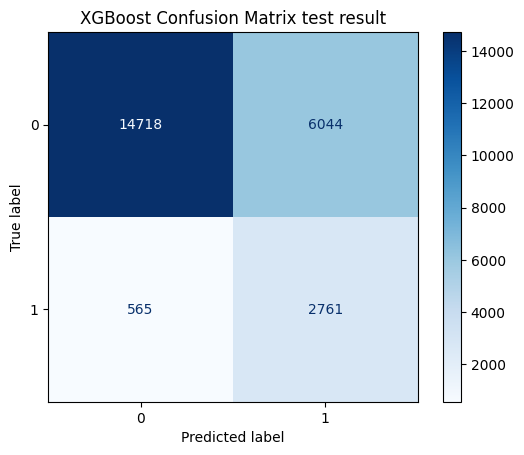

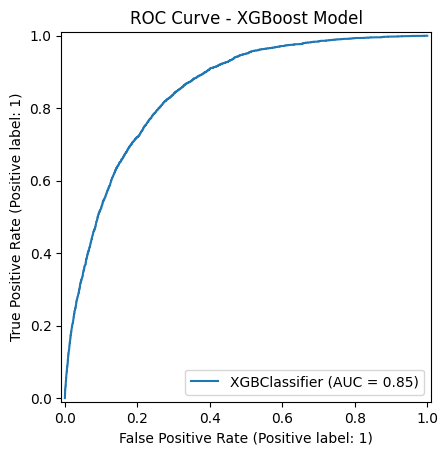

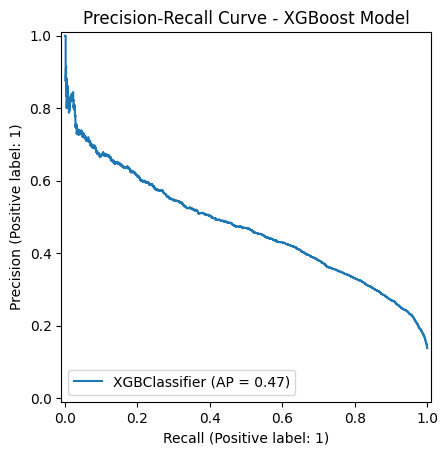

In [75]:
from sklearn.metrics  import RocCurveDisplay, precision_recall_curve, ConfusionMatrixDisplay
y_prob_test = xgb_best_model_2.predict_proba(X_test)[:, 1]

# --- Scalar metrics ---
acc  = accuracy_score(y_test, y_test_pred_xgb)
f1   = f1_score(y_test, y_test_pred_xgb)
roc  = roc_auc_score(y_test, y_test_pred_xgb)

print(f"Accuracy:  {acc:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"ROC-AUC:   {roc:.3f}\n")
print("Classification report:\n", classification_report(y_test, y_test_pred_xgb))


# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_xgb)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("XGBoost Confusion Matrix test result")
plt.savefig("output/xgb_test_confusion_matrix.png")

# ROC Curve
roc_display = RocCurveDisplay.from_estimator(xgb_best_model_2, X_test, y_test)
roc_display.ax_.set_title("ROC Curve - XGBoost Model")
roc_display.figure_.savefig("output/xgb_test_roc_curve.png")


# Precision-Recall Curve
pr_display = PrecisionRecallDisplay.from_estimator(xgb_best_model_2, X_test, y_test)
pr_display.ax_.set_title("Precision-Recall Curve - XGBoost Model") 
pr_display.figure_.savefig("output/xgb_test_precision_recall_curve.png")

In [71]:
import joblib
import json
from pathlib import Path


# Create an artifacts folder
Path("artifacts").mkdir(exist_ok=True)

# Save the fitted estimator
joblib.dump(xgb_best_model_2, "artifacts/xgb_final_model.joblib")

# Save column order / feature names used for training
#    (important to build a deploy-time DataFrame for prediction)
with open("artifacts/feature_columns.json", "w") as f:
    json.dump(list(X_train.columns), f, indent=2)

# Save evaluation summary
summary = {
    "set": "test",
    "accuracy": float(acc),
    "f1": float(f1),
    "roc_auc": float(roc),
    "confusion_matrix": cm.tolist(),
    "n_test": int(len(y_test)),
}
with open("artifacts/test_metrics.json", "w") as f:
    json.dump(summary, f, indent=2)


## conclusion (Final Model Selection & Fairness Evaluation)

### 1. Overview
Three models were evaluated on the **validation set** to guide final model selection:
- **Logistic Regression (LR)**
- **Random Forest (RF)**
- **XGBoost (XGB)**

The primary metric for decision-making was **recall** for the positive (diabetic) class, given the importance of identifying as many true positives as possible in a healthcare context.  
**Fairness metrics** were also computed on the validation set to ensure the chosen model would not disproportionately underperform on any demographic subgroup.

After selecting the best-performing model based on validation results, the **test set** was used **only for the final model** to verify generalisation and fairness.

---

### 2. Validation Set Results

| Model        | Accuracy | Recall | Precision | F1-score |
|--------------|----------|--------|-----------|----------|
| Logistic Reg | 0.75 | 0.78 | 0.33 | 0.46 |
| RandomForest | 0.74 | 0.80 | 0.32 | 0.46 |
| XGBoost      | 0.725 | 0.828 | 0.313 | 0.454 |

**Observations:**  
- Recall increased from LR → RF → XGB, with XGB achieving the highest recall.  
- Precision and accuracy dropped slightly as recall improved (expected trade-off).  
---

### 3. Fairness Observations (Validation Set)
Fairness was evaluated for each racial group using accuracy, precision, and recall. Despite dataset imbalance, consistent subgroup patterns emerged.

- **Logistic Regression (LR)**
  - Strengths: Balanced performance across subgroups, moderate recall.
  - Weaknesses: Lower recall overall compared to XGB; notable precision variation between groups.
  - Highest Recall: Black Only (0.857)
  - Lowest Recall: White Only (0.762)
  - Highest Precision: Black Only (0.405)
  - Lowest Precision: White Only (0.312)

- **Random Forest (RF)**
  - Strengths: Slightly improved precision for some groups.
  - Weaknesses: Recall was actually lower than LR for all groups except White Only; precision disparities persisted.
  - Highest Recall: White Only (0.802)
  - Lowest Recall: Non-Hispanic Other (0.759)
  - Highest Precision: Multiracial (0.420)
  - Lowest Precision: White Only (0.296)

- **XGBoost (XGB)**
  - Strengths: Highest recall for most groups, maintaining fairness gaps similar to LR despite improved recall.
  - Weaknesses: Precision remained modest, especially for White Only and Hispanic groups.
  - Highest Recall: Black Only (0.889)
  - Lowest Recall: White Only (0.814)
  - Highest Precision: Black Only (0.393)
  - Lowest Precision: White Only (0.294)ween subgroups were smaller in the XGBoost model, suggesting its ability to capture more nuanced patterns and maintain stability across varying subgroup sizes.

- **Disparity**

Across all models (Logistic Regression, Random Forest, XGBoost), disparities were observed in recall and precision across racial/ethnic groups:

  -Recall: While generally high across groups, performance varies. Some groups consistently achieve much higher recall than others, meaning the likelihood of detecting a positive case is not uniform. Random Forest showed the smallest recall disparity, but it was still present.

  - Precision: Variation exists across all models, indicating that the rate of false positives differs by group. This could lead to uneven follow-up testing or unnecessary interventions for certain populations.

  - The Black Only group often had the highest recall (sometimes by a large margin) but also the lowest accuracy, showing a trade-off between catching more positives and making more incorrect predictions.

These patterns highlight the importance of considering fairness-aware evaluation in addition to overall accuracy, especially in health-related models where unequal error rates can impact patient outcomes.

##### Additional Observations:
- The lowest accuracy for all models was consistently in the Black Only group - despite this group having the highest recall.
- This pattern likely reflects higher sensitivity (recall) at the cost of misclassifying more negatives (lower accuracy).
- Although metric values shift slightly when the notebook is re-run, Black Only consistently has the top recall in most models.

These results suggest that while the dataset is imbalanced overall, subgroup-specific prevalence rates can strongly influence model fairness outcomes. However, further testing on more balanced datasets is recommended to confirm whether these results generalise.

---

### 4. Test Set Results for Final Model (XGBoost)

| Metric    | Value |
|-----------|-------|
| Accuracy  | 0.73 |
| Recall    | 0.83 |
| Precision | 0.31 |
| F1-score  | 0.46 |

**Fairness Observations (Test Set - Final Model: XGB)**:  
  - Highest Recall: Hispanic (0.986)
  - Lowest Recall: White Only (0.821)
  - Highest Precision: Black Only (0.376)
  - Lowest Precision: White Only (0.290)
  - Lowest Accuracy: Black Only (0.658) — again reflecting the recall/accuracy trade-off.

**Conclusion on Fairness**:
Across validation and test sets, XGB offered:
- Best Recall – important for a medical diagnosis context.
- Comparable Fairness Gaps – similar to LR but with higher recall.
---

### 5. Final Decision
**XGBoost** was chosen as the final model because:
1. **Best Recall**: Minimises false negatives in a medical diagnosis context.  
2. **Fairness Balance**: Comparable subgroup fairness to LR but with much higher recall.  
3. **Stable Generalisation**: Maintained performance from validation to test set.  

---

### 6. Next Steps
- **Automate Early EDA & Feature Selection**: Explore specialised tools (e.g. automated feature selection libraries) to reduce the need for fully manual review of variables (e.g., going through the CDC codebook feature-by-feature).  
- **Improve Data Balance**: Collect or source more balanced datasets to strengthen performance on underrepresented groups, even though results for the Black subgroup were surprisingly strong across all models despite its smaller sample size.  
- **Model Deployment**: Package and deploy the final model (e.g., via FastAPI, Streamlit, or a cloud service) to enable real-time predictions and usability for stakeholders.  

